# Customer Churn Prediction 

## Introduction

In today's competitive telecommunications industry, retaining customers is a top priority. Customer churn, or attrition, can have a significant impact on a company's bottom line. Leveraging data and machine learning can help predict and address churn effectively.

This project explores churn prediction using a telecom dataset. We'll conduct thorough exploratory data analysis (EDA) to understand the key factors affecting churn and apply various machine learning models for prediction. Our aim is to provide actionable insights and predictive tools to empower telecom companies to reduce churn.

This notebook takes you through data cleaning, analysis, model selection, and evaluation.

### Importing libraries

In [1]:
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

## Algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, accuracy_score, log_loss, classification_report
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
from imblearn.pipeline import make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator, TransformerMixin

import warnings

warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

Dataset

In [2]:
telco = pd.read_csv('./data/telco_churn_data.csv')

In [3]:
pd.set_option('display.max_columns', None)
telco.head()

,Customer ID,Referred a Friend,Number of Referrals,Tenure in Months,Offer,Phone Service,Avg Monthly Long Distance Charges,Multiple Lines,Internet Service,Internet Type,Avg Monthly GB Download,Online Security,Online Backup,Device Protection Plan,Premium Tech Support,Streaming TV,Streaming Movies,Streaming Music,Unlimited Data,Contract,Paperless Billing,Payment Method,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Gender,Age,Under 30,Senior Citizen,Married,Dependents,Number of Dependents,City,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Churn Category,Churn Reason,Total Customer Svc Requests,Product/Service Issues Reported,Customer Satisfaction
0,8779-QRDMV,No,0,1,None,No,0.00,No,Yes,Fiber Optic,9,No,No,Yes,No,No,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,41.236,39.65,0.00,0.0,0.00,Male,78,No,Yes,No,No,0,Los Angeles,90022,34.023810,-118.156582,68701,1,5433,Competitor,Competitor offered more data,5,0,NaN
1,7495-OOKFY,Yes,1,8,Offer E,Yes,48.85,Yes,Yes,Cable,19,No,Yes,No,No,No,No,No,No,Month-to-Month,Yes,Credit Card,83.876,633.30,0.00,120.0,390.80,Female,74,No,Yes,Yes,Yes,1,Los Angeles,90063,34.044271,-118.185237,55668,1,5302,Competitor,Competitor made better offer,5,0,NaN
2,1658-BYGOY,No,0,18,Offer D,Yes,11.33,Yes,Yes,Fiber Optic,57,No,No,No,No,Yes,Yes,Yes,Yes,Month-to-Month,Yes,Bank Withdrawal,99.268,1752.55,45.61,0.0,203.94,Male,71,No,Yes,No,Yes,3,Los Angeles,90065,34.108833,-118.229715,47534,1,3179,Competitor,Competitor made better offer,1,0,NaN
3,4598-XLKNJ,Yes,1,25,Offer C,Yes,19.76,No,Yes,Fiber Optic,13,No,Yes,Yes,No,Yes,Yes,No,No,Month-to-Month,Yes,Bank Withdrawal,102.440,2514.50,13.43,327.0,494.00,Female,78,No,Yes,Yes,Yes,1,Inglewood,90303,33.936291,-118.332639,27778,1,5337,Dissatisfaction,Limited range of services,1,1,2.0
4,4846-WHAFZ,Yes,1,37,Offer C,Yes,6.33,Yes,Yes,Cable,15,No,No,No,No,No,No,No,No,Month-to-Month,Yes,Bank Withdrawal,79.560,2868.15,0.00,430.0,234.21,Female,80,No,Yes,Yes,Yes,1,Whittier,90602,33.972119,-118.020188,26265,1,2793,Price,Extra data charges,1,0,2.0


Features of the dataset:

1. **Customer ID:** A unique ID that identifies each customer
2. **Referred a Friend:** Indicates if the customer has ever referred a friend or family member to this company
3. **Number of Referrals:** Indicates the number of referrals to date that the customer has made
4. **Tenure in Months:** Indicates the total amount of months that the customer has been with the company by the end of the quarter specified
5. **Offer:** Identifies the last marketing offer that the customer accepted, if applicable
6. **Phone Service:** Indicates if the customer subscribes to home phone service with the company
7. **Avg Monthly Long Distance Charges:** Indicates the customer’s average long distance charges, calculated to the end of the quarter
8. **Multiple Lines:** Indicates if the customer subscribes to multiple telephone lines with the company
9. **Internet Service:** Indicates if the customer subscribes to Internet service with the company
10. **Internet Type:** Indicates the type of Internet service the customer subscribes
11. **Avg Monthly GB Download:** Indicates the customer’s average download volume in gigabytes, calculated to the end of the quarter
12. **Online Security:** Indicates if the customer subscribes to an additional online security service provided by the company
13. **Online Backup:** Indicates if the customer subscribes to an additional online backup service provided by the company
14. **Device Protection Plan:** Indicates if the customer subscribes to an additional device protection plan for their Internet equipment
15. **Premium Tech Support:** Indicates if the customer subscribes to an additional technical support plan from the company with reduced
16. **Streaming TV:** Indicates if the customer uses their Internet service to stream television programing from a third party provider
17. **Streaming Movies:** Indicates if the customer uses their Internet service to stream movies from a third party provider
18. **Streaming Music:** Indicates if the customer uses their Internet service to stream music from a third party provider
19. **Unlimited Data:** Indicates if the customer has paid an additional monthly fee to have unlimited data downloads/uploads
20. **Contract:** Indicates the customer’s current contract type
21. **Paperless Billing:** Indicates if the customer has chosen paperless billing
22. **Payment Method:** Indicates how the customer pays their bill
23. **Monthly Charge:** Indicates the customer’s current total monthly charge for all their services from the company
24. **Total Regular Charges:** Indicates the customer’s total regular charges, excluding additional charges
25. **Total Refunds:** Indicates the customer’s total refunds
26. **Total Extra Data Charges:** Indicates the customer’s total charges for extra data downloads above those specified in their plan
27. **Total Long Distance Charges:** Total charges for long distance calls
28. **Gender:** The customer’s gender
29. **Age:** The customer’s current age
30. **Under 30:** Indicates if the customer is under 30 years old
31. **Senior Citizen:** Indicates if the customer is 65 or older
32. **Married:** Indicates if the customer is married
33. **Dependents:** Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents,
34. **Number of Dependents:** Indicates the number of dependents that live with the customer
35. **City:** The city of the customer’s primary residence
36. **Zip Code:** The zip code of the customer’s primary residence
37. **Latitude:** The latitude of the customer’s primary residence
38. **Longitude:** The longitude of the customer’s primary residence
39. **Population:** A current population estimate for the entire Zip Code area
40. **Churn Value:** 1 = the customer left the company this quarter. 0 = the customer remained with the company
41. **CLTV:** Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data.
42. **Churn Category:** A high-level category for the customer’s reason for churning
43. **Churn Reason:** A customer’s specific reason for leaving the company
44. **Total Customer Svc Requests:** Number of times the customer contacted customer service in the past quarter
45. **Product/Service Issues Reported:** Number of times the customer reported an issue with a product or service in the past quarter
46. **Customer Satisfaction:** A customer’s overall satisfaction rating of the company from 1 (Very Unsatisfied) to 5 (Very Satisfied)

## Dataset Exploration

In [4]:
telco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 46 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Customer ID                        7043 non-null   object 
 1   Referred a Friend                  7043 non-null   object 
 2   Number of Referrals                7043 non-null   int64  
 3   Tenure in Months                   7043 non-null   int64  
 4   Offer                              7043 non-null   object 
 5   Phone Service                      7043 non-null   object 
 6   Avg Monthly Long Distance Charges  7043 non-null   float64
 7   Multiple Lines                     7043 non-null   object 
 8   Internet Service                   7043 non-null   object 
 9   Internet Type                      7043 non-null   object 
 10  Avg Monthly GB Download            7043 non-null   int64  
 11  Online Security                    7043 non-null   objec

Treating Duplicated and Missing Values

In [5]:
# replacing the null values in Offer and internet type with "none" string
telco["Offer"] = telco["Offer"].fillna("None")
telco["Internet Type"] = telco["Internet Type"].fillna("None")

In [6]:
# We look at the columns where there are missing values and we then filter so we can only see those who have more than 0 missing values
missing_values = telco.isna().sum()
columns_with_missing_values = missing_values[missing_values > 0]
print("Missing values per column:")
print(columns_with_missing_values)


Missing values per column:
Churn Category           5174
Churn Reason             5174
Customer Satisfaction    5209
dtype: int64


Before dropping these columns, it's essential to assess whether they are genuinely unnecessary for your analysis or if there are alternative ways to handle the missing data. 

In [7]:
# with .unique() we are able to look at the unique values of each column

unique_values_churn_category = telco['Churn Category'].unique()
unique_values_churn_reason = telco['Churn Reason'].unique()
unique_values_customer_satisfaction = telco['Customer Satisfaction'].unique()

print("Unique values in Churn Category:")
print(unique_values_churn_category)

print("\nUnique values in Churn Reason:")
print(unique_values_churn_reason)

print("\nUnique values in Customer Satisfaction:")
print(unique_values_customer_satisfaction)


Unique values in Churn Category:
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]

Unique values in Churn Reason:
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service provider' 'Poor expertise of phone support'
 'Deceased' nan 'Lack of self-service on Website']

Unique values in Customer Satisfaction:
[nan  2.  1.  3.  5.  4.]


While these columns contain valuable information for analysis, the presence of a substantial number of missing values poses a significant challenge. Attempting to impute missing data is not a feasible option as it may lead to inaccuracies by fabricating data. Also, they are features which explain the reason of churn once the customer has churned therefore it won´t be relevant for predicting churn but it could be interesting for analyzing churn reasons within the company.

In [8]:
telco = telco.drop(['Churn Category', 'Churn Reason', 'Customer Satisfaction'], axis=1)


We also check if there are any duplicated values

In [9]:
print('Duplicated values: ', telco.duplicated().sum())

Duplicated values:  0


In [10]:
columns_to_drop = ['Under 30', 'Referred a Friend']
telco.drop(columns=columns_to_drop, inplace=True)


We get rid of these variables beacause they are redundant and can be explained with other variables

### Basic Statistics

It is important to look at the basic statistics of the numerical columns to get a quick view of the distribution of the features

In [11]:
telco.describe()

,Number of Referrals,Tenure in Months,Avg Monthly Long Distance Charges,Avg Monthly GB Download,Monthly Charge,Total Regular Charges,Total Refunds,Total Extra Data Charges,Total Long Distance Charges,Age,Number of Dependents,Zip Code,Latitude,Longitude,Population,Churn Value,CLTV,Total Customer Svc Requests,Product/Service Issues Reported
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,1.951867,32.386767,22.958954,21.110890,65.538800,2280.381264,1.962182,278.499225,749.099262,46.509726,0.468692,93486.070567,36.197455,-119.756684,22139.603294,0.265370,4400.295755,1.338776,0.308107
std,3.001199,24.542061,15.448113,20.948471,30.606805,2266.220462,7.902614,685.039625,846.660055,16.750352,0.962802,1856.767505,2.468929,2.154425,21152.392837,0.441561,1183.057152,1.430471,0.717514
min,0.000000,1.000000,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,19.000000,0.000000,90001.000000,32.555828,-124.301372,11.000000,0.000000,2003.000000,0.000000,0.000000
25%,0.000000,9.000000,9.210000,3.000000,35.890000,400.150000,0.000000,0.000000,70.545000,32.000000,0.000000,92101.000000,33.990646,-121.788090,2344.000000,0.000000,3469.000000,0.000000,0.000000
50%,0.000000,29.000000,22.890000,17.000000,71.968000,1394.550000,0.000000,0.000000,401.440000,46.000000,0.000000,93518.000000,36.205465,-119.595293,17554.000000,0.000000,4527.000000,1.000000,0.000000
75%,3.000000,55.000000,36.395000,28.000000,90.650000,3786.600000,0.000000,182.620000,1191.100000,60.000000,0.000000,95329.000000,38.161321,-117.969795,36125.000000,1.000000,5380.500000,2.000000,0.000000
max,11.000000,72.000000,49.990000,94.000000,123.084000,8684.800000,49.790000,6477.000000,3564.720000,80.000000,9.000000,96150.000000,41.962127,-114.192901,105285.000000,1.000000,6500.000000,9.000000,6.000000


Conclusions

1. **Number of Referrals:** The "Number of Referrals" column has an average of approximately 1.95, suggesting that, on average, customers have made a moderate number of referrals. The minimum value is 0, indicating that some customers have not made any referrals.

2. **Tenure in Months:** The average tenure of customers is around 32.39 months. The range of tenure varies from 1 month to 72 months. This provides information about the duration of the relationship with customers.

3. **Average Monthly Charges:** The average monthly charge is approximately $65.54, with a range from $18.25 to $123.08. This indicates the variability in monthly charges among customers.

4. **Age:** The average age of customers is approximately 46.51 years, with a standard deviation of around 16.75. The age range varies from 19 years to 80 years.

5. **Number of Dependents:** Most customers have 0 dependents, as observed in the 75th percentile, but the range of this variable goes from 0 to 9. This indicates that some customers have a significant number of dependents.

6. **Churn Value:** Approximately 26.54% of customers have a churn value of 1, indicating they have churned the service, while 73.46% have a churn value of 0, suggesting they are still customers.

### Data imbalance

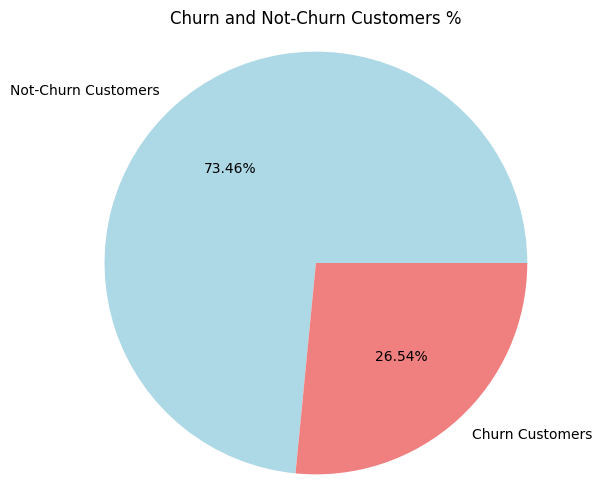

In [12]:
# Calculate the proportion of 0 and 1 in Churn Value
churn_proportions = telco['Churn Value'].value_counts(normalize=True)

# Labels and colors
labels = ['Not-Churn Customers', 'Churn Customers']
colors = ['lightblue', 'lightcoral']

# Create the pie chart
plt.figure(figsize=(6, 6))
plt.pie(churn_proportions, labels=labels, autopct='%1.2f%%', colors=colors)
plt.title('Churn and Not-Churn Customers %')

# Show the chart
plt.axis('equal')  # Equal aspect to make it a circle
plt.show()


### Importance of Metrics

- The goal is to avoid misclassifying a churned customer as non-churned, as this could lead to missed opportunities for churn prevention.
- Incorrectly labeling a non-churned customer as churning may not harm the customer but would result in unnecessary resource allocation.
- Accepting a certain degree of this situation is possible if it helps accurately identify churned customers.
- The primary objective is to minimize false negatives, where a churning customer is mistakenly categorized as non-churning.
- False positives, which involve identifying a non-churning customer as churning, are less critical since they do not negatively impact the customer, even though they require extra effort.

The most suitable metrics are:

- **Recall:** the ability of a model to find all the relevant cases within a data set.
- **ROC-AUC:** ROC is a probability curve and AUC represents the degree or measure of separability. It tells how much the model is capable of distinguishing between classes.

## EDA

The Exploratory Data Analysis phase is a fundamental step in our data exploration journey. It helps us see the structure, trends, and characteristics. By visualizing and summarizing key aspects of the data, we aim to gain a deeper understanding of customer behavior, identify patterns, and discover significant features. 

### Numerical Columns

It is essential to examine the correlations among features to gain insights into how variables in the dataset relate to one another. A correlation matrix provides a clear visual representation of these relationships, enabling us to identify patterns, dependencies, and potential multicollinearity between variables. This analysis is crucial for understanding which factors may impact the target variable, Churn Rate, and guide feature selection during the model-building process.

C:\Users\river\AppData\Local\Temp\ipykernel_43212\545427311.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = telco.corr()


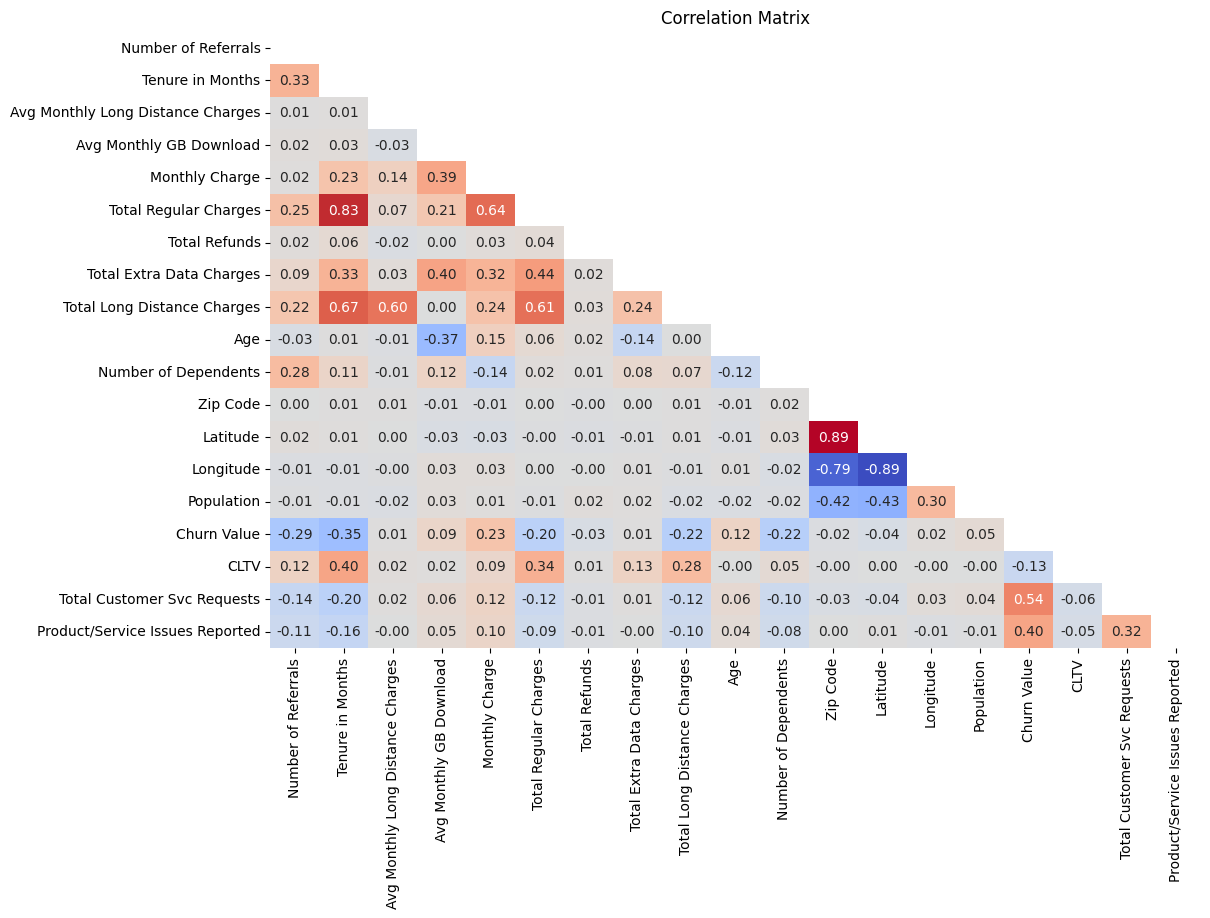

In [13]:
import numpy as np

# Calculate the Pearson correlation matrix
correlation_matrix = telco.corr()

# Create a mask to select the lower diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set the figure size
plt.figure(figsize=(12, 8))

# Create the heatmap of the correlation matrix with the lower diagonal in white
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt=".2f", cbar=False)
plt.title("Correlation Matrix")
plt.show()


### Distributions

In order to identify potential outliers or anomalies we visualize the distribution of some of the numerical columns.

In statistics, "skew" measures whether a data distribution is symmetrical or not. A negative value indicates a long tail on the left side (right-skewed), while a positive value indicates a long tail on the right side (left-skewed). Near zero means symmetry. Skewness helps understand the shape of the distribution and identify unusual values.

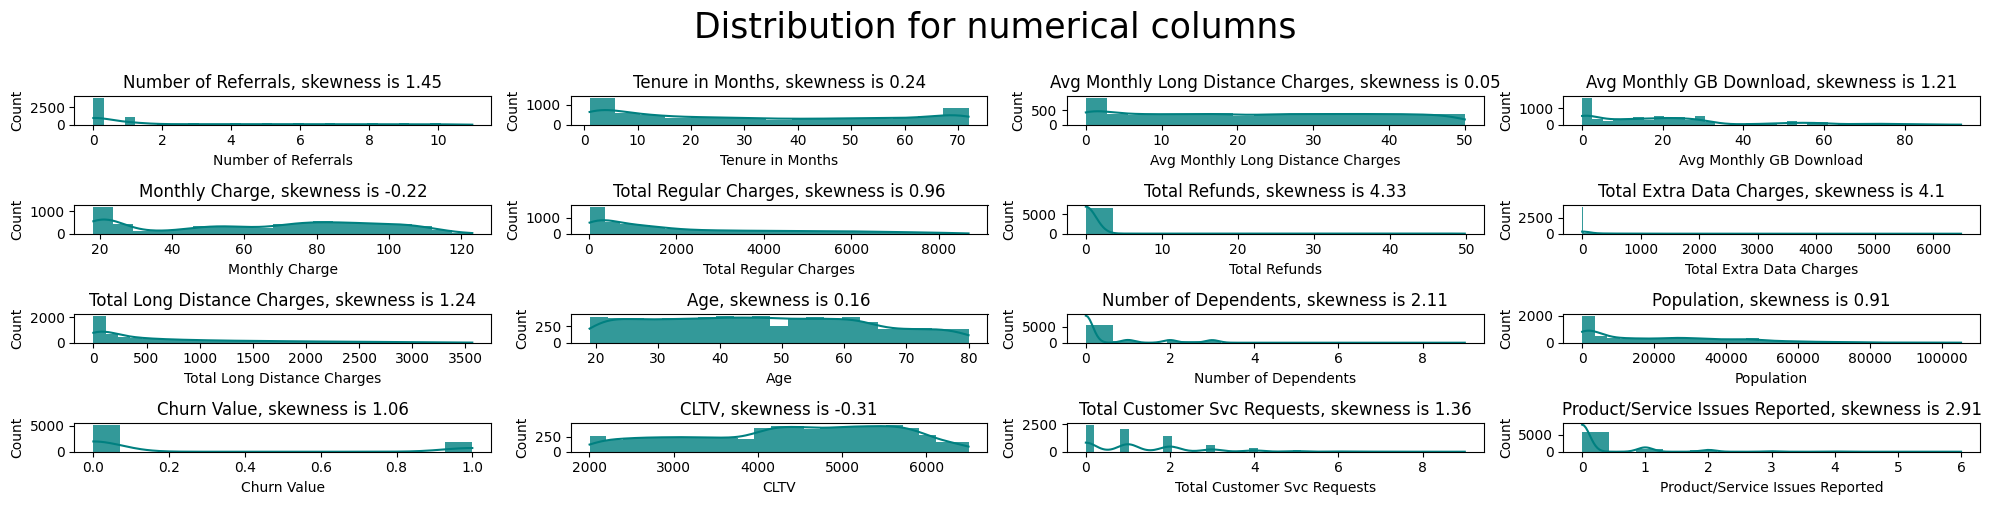

In [14]:
interest_columns = [
    'Number of Referrals', 'Tenure in Months', 'Avg Monthly Long Distance Charges',
    'Avg Monthly GB Download', 'Monthly Charge', 'Total Regular Charges',
    'Total Refunds', 'Total Extra Data Charges', 'Total Long Distance Charges',
    'Age', 'Number of Dependents', 'Population',
    'Churn Value', 'CLTV', 'Total Customer Svc Requests', 'Product/Service Issues Reported'
]

# Creating a function to organize and structure the visualizations

def dist_custom(dataset, columnas_interes, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, figsize=(20, 5))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, data in enumerate(columnas_interes):
        sns.histplot(dataset[data], kde=True, ax=axs[i], fill=True, alpha=0.8, linewidth=0, color='#008080')
        axs[i].set_title(data + ', skewness is ' + str(round(dataset[data].skew(axis=0, skipna=True), 2)))

    plt.tight_layout()
    plt.show()

dist_custom(dataset=telco, columnas_interes=interest_columns, rows=4, cols=4, suptitle='Distribution for numerical columns')


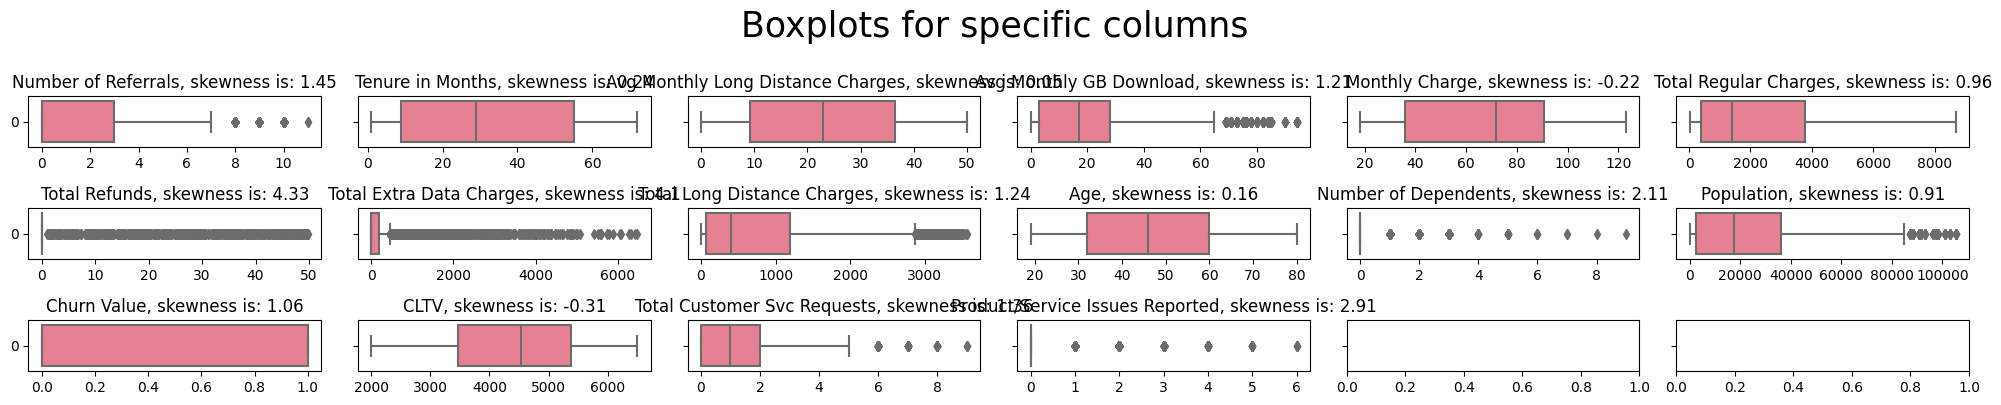

In [15]:
# the same logic is used and we create a function to customize boxplots

def boxplots_custom(dataset, interest_columns, rows, cols, suptitle):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=(20, 4))
    fig.suptitle(suptitle, y=1, size=25)
    axs = axs.flatten()

    for i, column in enumerate(interest_columns):
        skewness = round(dataset[column].skew(axis=0, skipna=True), 2)
        axs[i].set_title(f'{column}, skewness is: {skewness}')
        sns.boxplot(data=dataset[column], orient='h', ax=axs[i], palette='husl')

    plt.tight_layout()
    plt.show()

boxplots_custom(dataset=telco, interest_columns=interest_columns, rows=3, cols=6, suptitle='Boxplots for specific columns')


### Features VS Churn Value

In this section, we examine how specific features relate to the "Churn Value." The goal is to understand whether these features help explain why customers churn. We use visualizations to compare the distribution of selected features among customers who did not churn (labeled "Not Churn") and those who did churn (labeled "Churn"). 

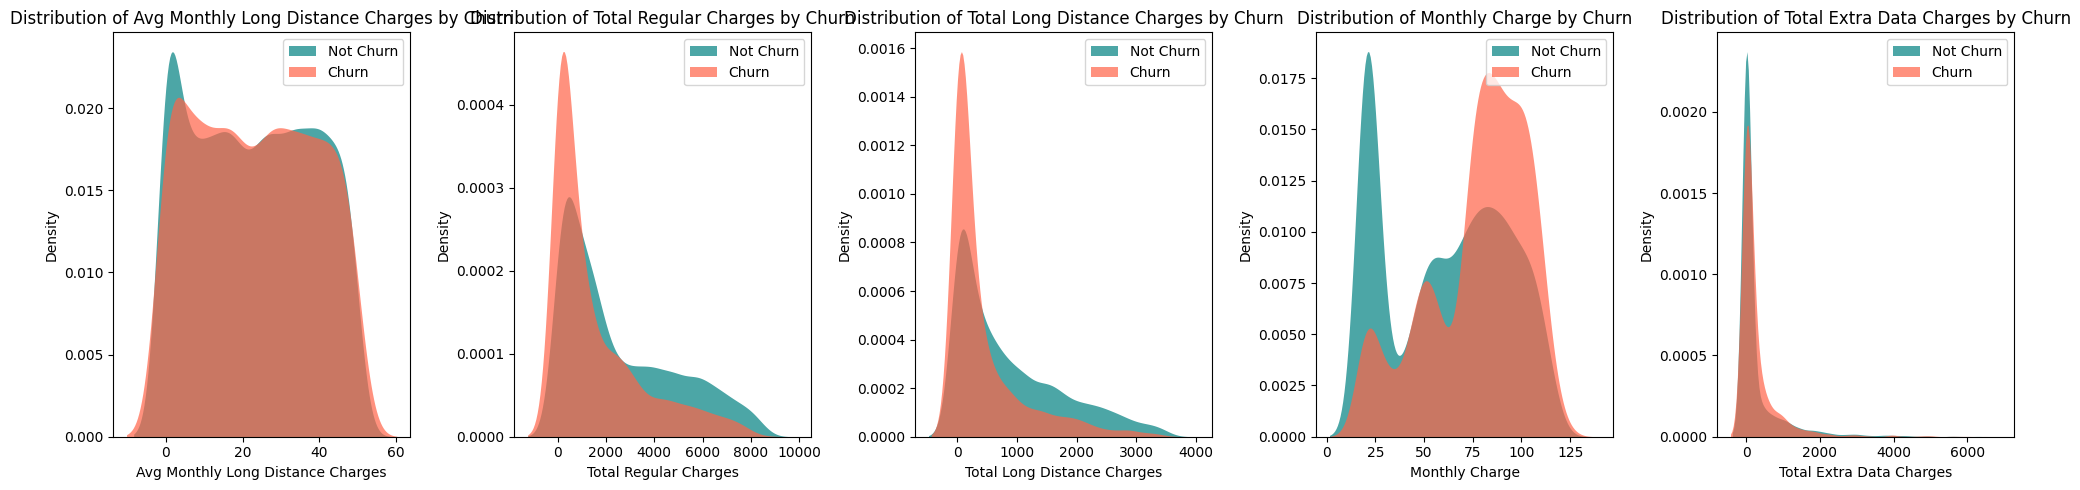

In [16]:
fig, axes = plt.subplots(1, 5, figsize=(20, 5))

columns_of_interest = [
    'Avg Monthly Long Distance Charges', 'Total Regular Charges',
    'Total Long Distance Charges', 'Monthly Charge', 'Total Extra Data Charges'
]

colors = ['#008080', '#FF6347']

for i, column in enumerate(columns_of_interest):
    plt.subplot(1, 5, i + 1)
    ax = sns.kdeplot(telco[column][(telco["Churn Value"] == 0)], color=colors[0], fill=True, alpha=0.7, linewidth=0)
    ax = sns.kdeplot(telco[column][(telco["Churn Value"] == 1)], color=colors[1], fill=True, alpha=0.7, linewidth=0)
    ax.legend(["Not Churn", "Churn"], loc='upper right')
    ax.set_ylabel('Density')
    ax.set_xlabel(column)
    ax.set_title(f'Distribution of {column} by Churn')

plt.tight_layout()
plt.show()


**Conclusions**

- Customers with higher monthly charges are more likely to churn

We now look at the tenure

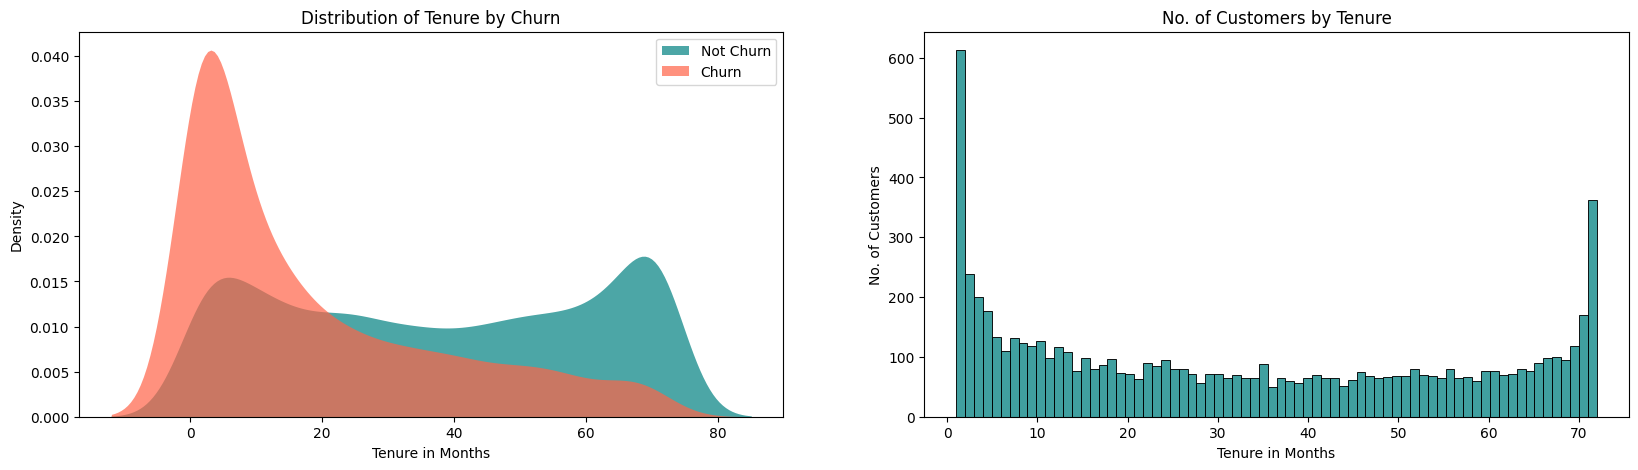

In [17]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(20, 5))


#Distribution of churn and not churn 

ax1 = sns.kdeplot(telco["Tenure in Months"][telco["Churn Value"] == 0], color='#008080', fill=True, alpha=0.7, linewidth=0, ax=ax1)
ax1 = sns.kdeplot(telco["Tenure in Months"][telco["Churn Value"] == 1], color='#FF6347', fill=True, alpha=0.7, linewidth=0, ax=ax1)
ax1.legend(["Not Churn", "Churn"], loc='upper right')
ax1.set_ylabel('Density')
ax1.set_xlabel('Tenure in Months')
ax1.set_title('Distribution of Tenure by Churn')

# Histograms
ax2 = sns.histplot(telco["Tenure in Months"], bins=72, kde=False, color='#008080', ax=ax2)
ax2.set_title("No. of Customers by Tenure")
ax2.set_ylabel('No. of Customers')
ax2.set_xlabel('Tenure in Months')

plt.show()


**Conclusions**

Based on the distribution and histogram plots, it is evident that customer tenure, represented in months, plays a significant role in churn prediction. The longer a customer has been with the service provider, the less likely they are to churn. This insight suggests that building long-term customer relationships can contribute to reduced churn rates and increased customer retention.

### Looking at the type of contract of the client

First we´ll have to convert the data into a numerical column

In [18]:
# Unique values in the Contract column 

unique_contracts = telco['Contract'].unique()
print(unique_contracts)

# Creating a dictionary to convert categorical to numerical

contract_mapping = {
    'Two Year': 2,
    'One Year': 1,
    'Month-to-Month': 0
}

# Now we map the values of Contract to the new values shown in the dictionary

telco['Contract'] = telco['Contract'].map(contract_mapping)

['Month-to-Month' 'One Year' 'Two Year']


Now we visualize the distribution of customer tenure (the length of time they have been customers) for the three different contract types: Month-to-Month, One Year, and Two Year contracts. 

We firstly calculate the mean tenure for each contract type and then create three subplots to display histograms of customer tenure for each contract type. The histograms help analyze and compare the distribution of customer tenure across different contract types.

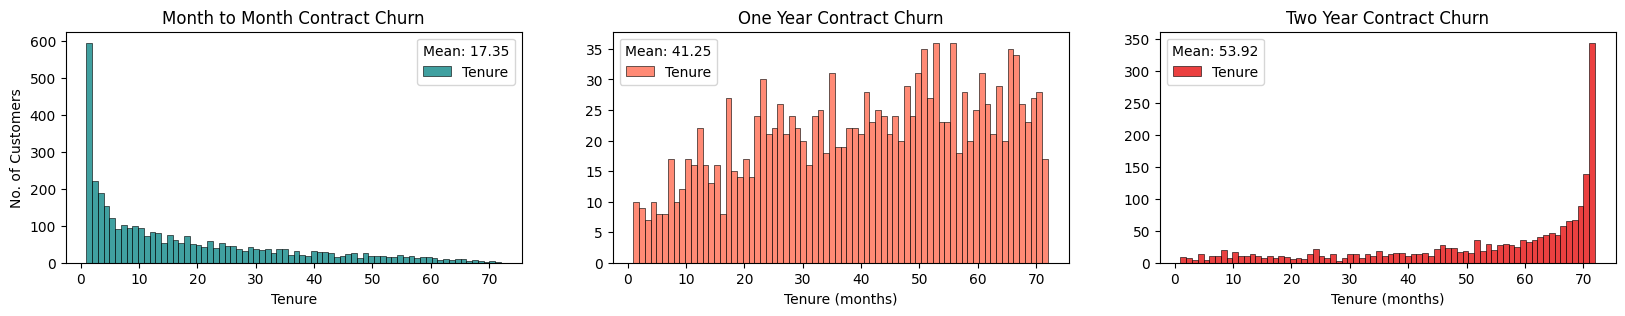

In [19]:
# To analyze the type of contract we calculate the mean tenure for each contract 

two_year_mean = round(telco[telco['Contract'] == 2]['Tenure in Months'].mean(), 2) # rounding to two decimals
month_mean = round(telco[telco['Contract'] == 0]['Tenure in Months'].mean(), 2)
year_mean = round(telco[telco['Contract'] == 1]['Tenure in Months'].mean(), 2)

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20, 3))

# We create three subplots to look at each contract invidually

plt.subplot(1, 3, 1)
ax = sns.histplot(telco[telco['Contract'] == 0]['Tenure in Months'], bins=72, color='#008080')
ax.legend(['Tenure'], loc='upper right', title=f'Mean: {month_mean}')
ax.set_ylabel('No. of Customers')
ax.set_xlabel('Tenure')
ax.set_title('Month to Month Contract Churn')

plt.subplot(1, 3, 2)
ax = sns.histplot(telco[telco['Contract'] == 1]['Tenure in Months'], bins=72, color='#FF6347')
ax.legend(['Tenure'], loc='upper left', title=f'Mean: {year_mean}')
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('One Year Contract Churn')

plt.subplot(1, 3, 3)
ax = sns.histplot(telco[telco['Contract'] == 2]['Tenure in Months'], bins=72, color='#E50000')
ax.legend(['Tenure'], loc='upper left', title=f'Mean: {two_year_mean}')
ax.set_ylabel('')
ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract Churn')

plt.show()


**Conclusions**

1. Many customers tend to churn after just one month of service, indicating a high churn rate among new customers.

2. A significant number of customers have remained with the service provider for 72 weeks, indicating a group of long-term, loyal customers.

3. The analysis suggests that customers with longer-term contracts tend to have a longer tenure with the service provider, as evidenced by the higher mean tenure scores for customers with one-year and two-year contracts. This indicates that longer contract durations may contribute to customer retention.

### Categorical Columns

### Customer info

Observing the categorical columns related to the customer info

In [20]:
customer_related_columns = ['Senior Citizen', 'Married', 'Dependents', 'Gender']

In order to identify any patterns or trends we display the distribution of customer-related dat apoints and their relation with the Churn Value

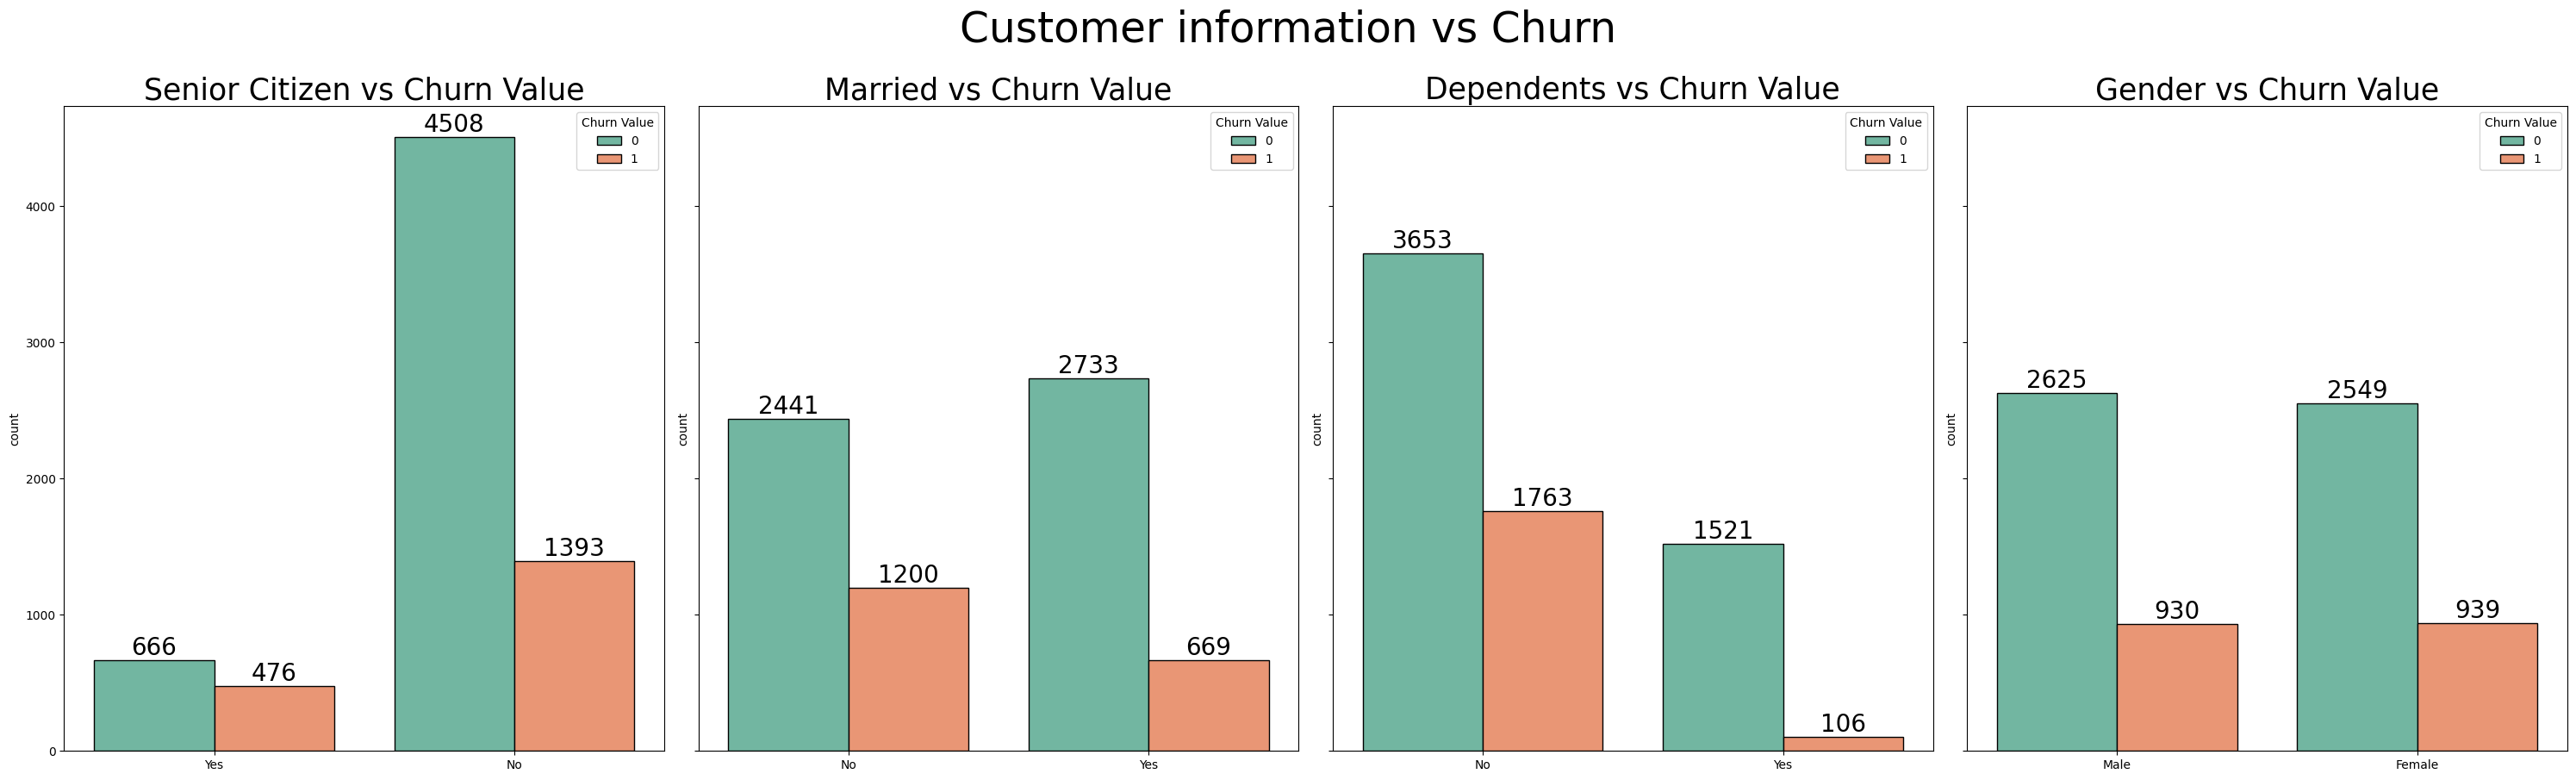

In [21]:
hue = "Churn Value"
figsize = (30, 9)
palette = "Set2"

# Fuction for creating countplots for each one of the columns in the column_list

def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle, y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax = sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for container in ax.containers:
            ax.bar_label(container, size=20)
            ax.set_xlabel('')

countplots_custom(dataset=telco, columns_list=customer_related_columns, rows=1, cols=4, figsize=figsize, hue=hue, palette=palette, suptitle='Customer information vs Churn')
plt.tight_layout()

From the countplots we can conclude that the relation between gender and Churn Value is small therefore is not relevant for our prediction whereas the other variables seem to explain why clients are churning 

### Services

In [22]:
provided_services_columns = [
    'Phone Service', 'Internet Service', 'Internet Type', 
    'Online Security', 'Online Backup', 'Device Protection Plan',
    'Premium Tech Support', 'Streaming TV', 'Streaming Movies',
    'Streaming Music', 'Unlimited Data'
]


The same is done with the columns related to the Services the customer has.

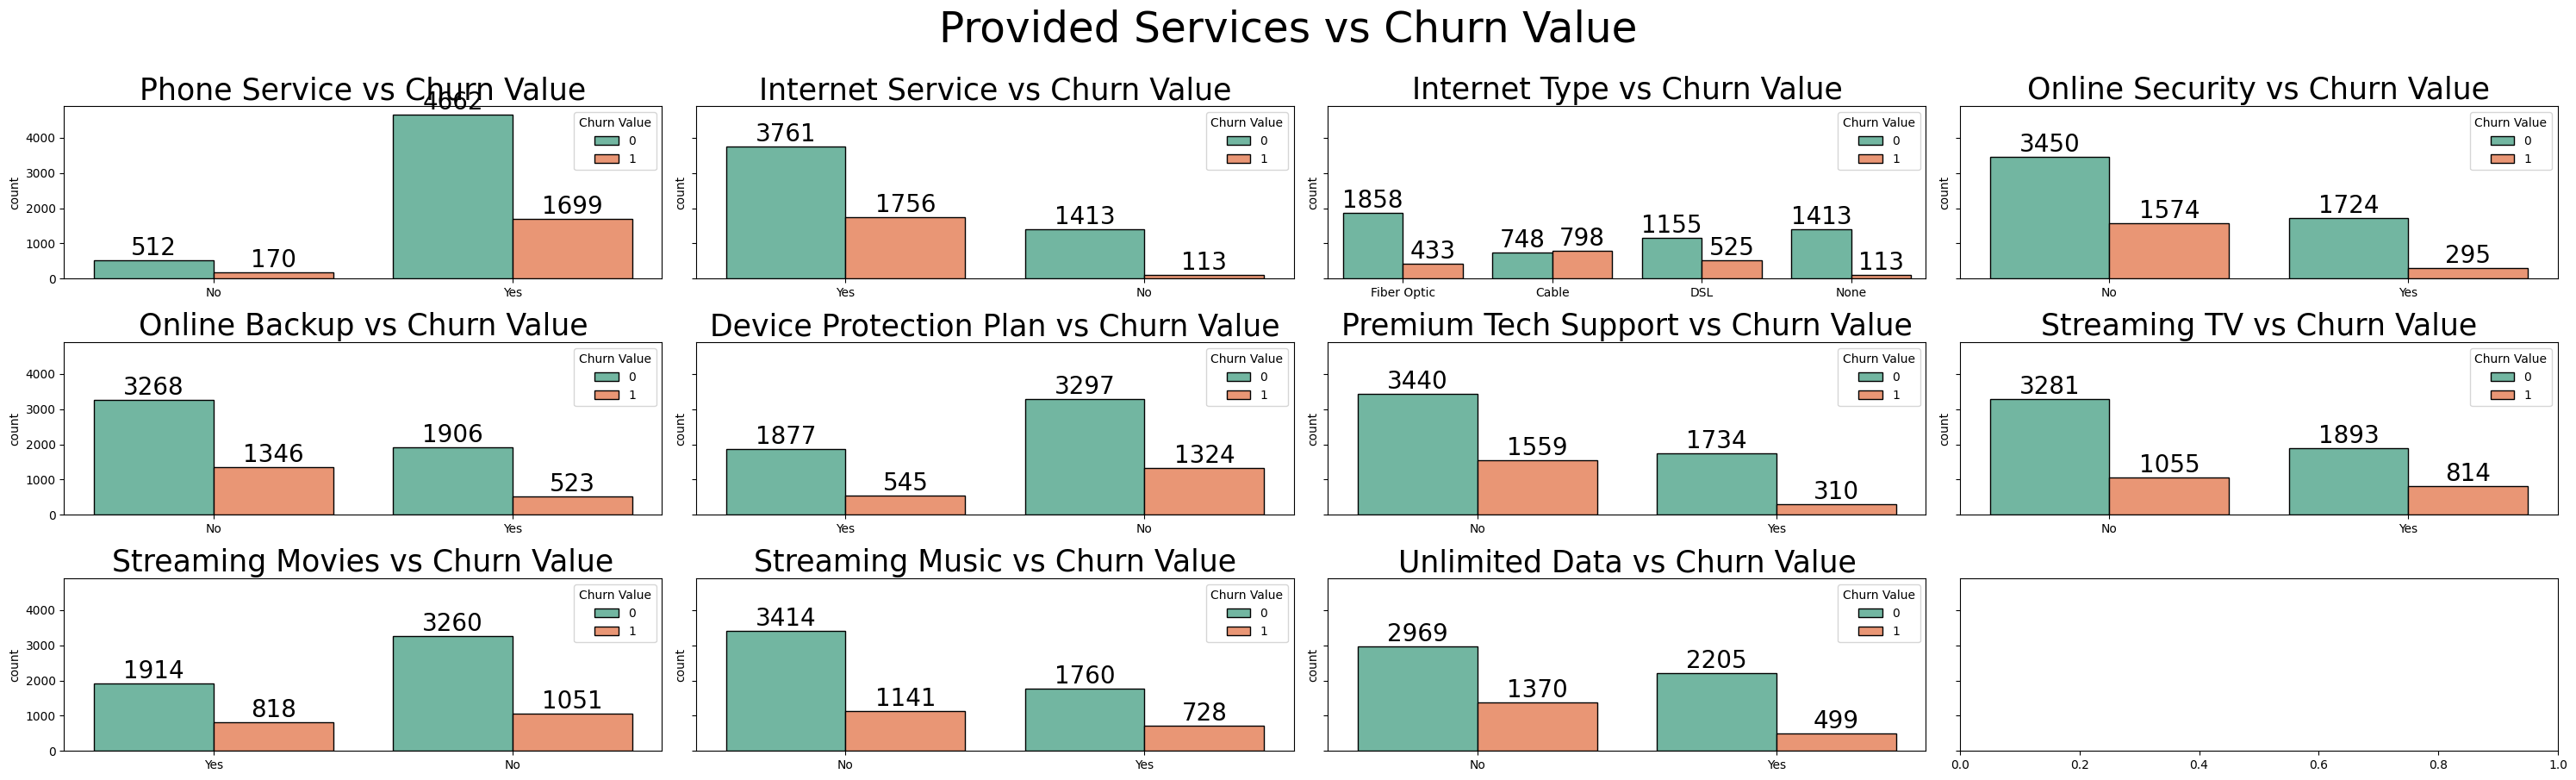

In [23]:
hue = "Churn Value"
figsize = (30, 9)
palette = "Set2"

def countplots_custom(dataset, columns_list, rows, cols, figsize, suptitle, hue, palette):
    fig, axs = plt.subplots(rows, cols, sharey=True, figsize=figsize)
    fig.suptitle(suptitle, y=1, size=35)
    axs = axs.flatten()
    for i, data in enumerate(columns_list):
        ax = sns.countplot(data=dataset, ax=axs[i], x=columns_list[i], hue=hue, palette=palette, edgecolor='black')
        axs[i].set_title(data + f' vs {hue}', size=25)
        for container in ax.containers:
            ax.bar_label(container, size=20)
            ax.set_xlabel('')

countplots_custom(dataset=telco, columns_list=provided_services_columns, rows=3, cols=4, figsize=figsize, hue=hue, palette=palette, suptitle='Provided Services vs Churn Value')
plt.tight_layout()


**Conclusions**

1. **Internet Service Conclusion:**
   - Customers who subscribe to Fiber for internet service have a significantly higher churn rate.
   - In contrast, customers using DSL internet service tend to have lower churn rates.
   - Customers without any internet service exhibit a notably low churn rate, suggesting they are less likely to churn.

2. **Support Services Conclusion:**
   - Customers who do not subscribe to support services such as Online Security, Online Backup, Device Protection Plan, Premium Tech Support are more prone to churning.
   

### Type of Payment

Finally we analyze the type of payment to check if it´s related to the Churn Value

First we have to reserve the mapping we did previously in the Contract column, so we have again a categorical column

In [24]:
contract_mapping_reverse = {v: k for k, v in contract_mapping.items()}
telco['Contract'] = telco['Contract'].map(contract_mapping_reverse)


In [25]:
payment_columns = [
    'Payment Method',
    'Contract',
    'Paperless Billing'
]

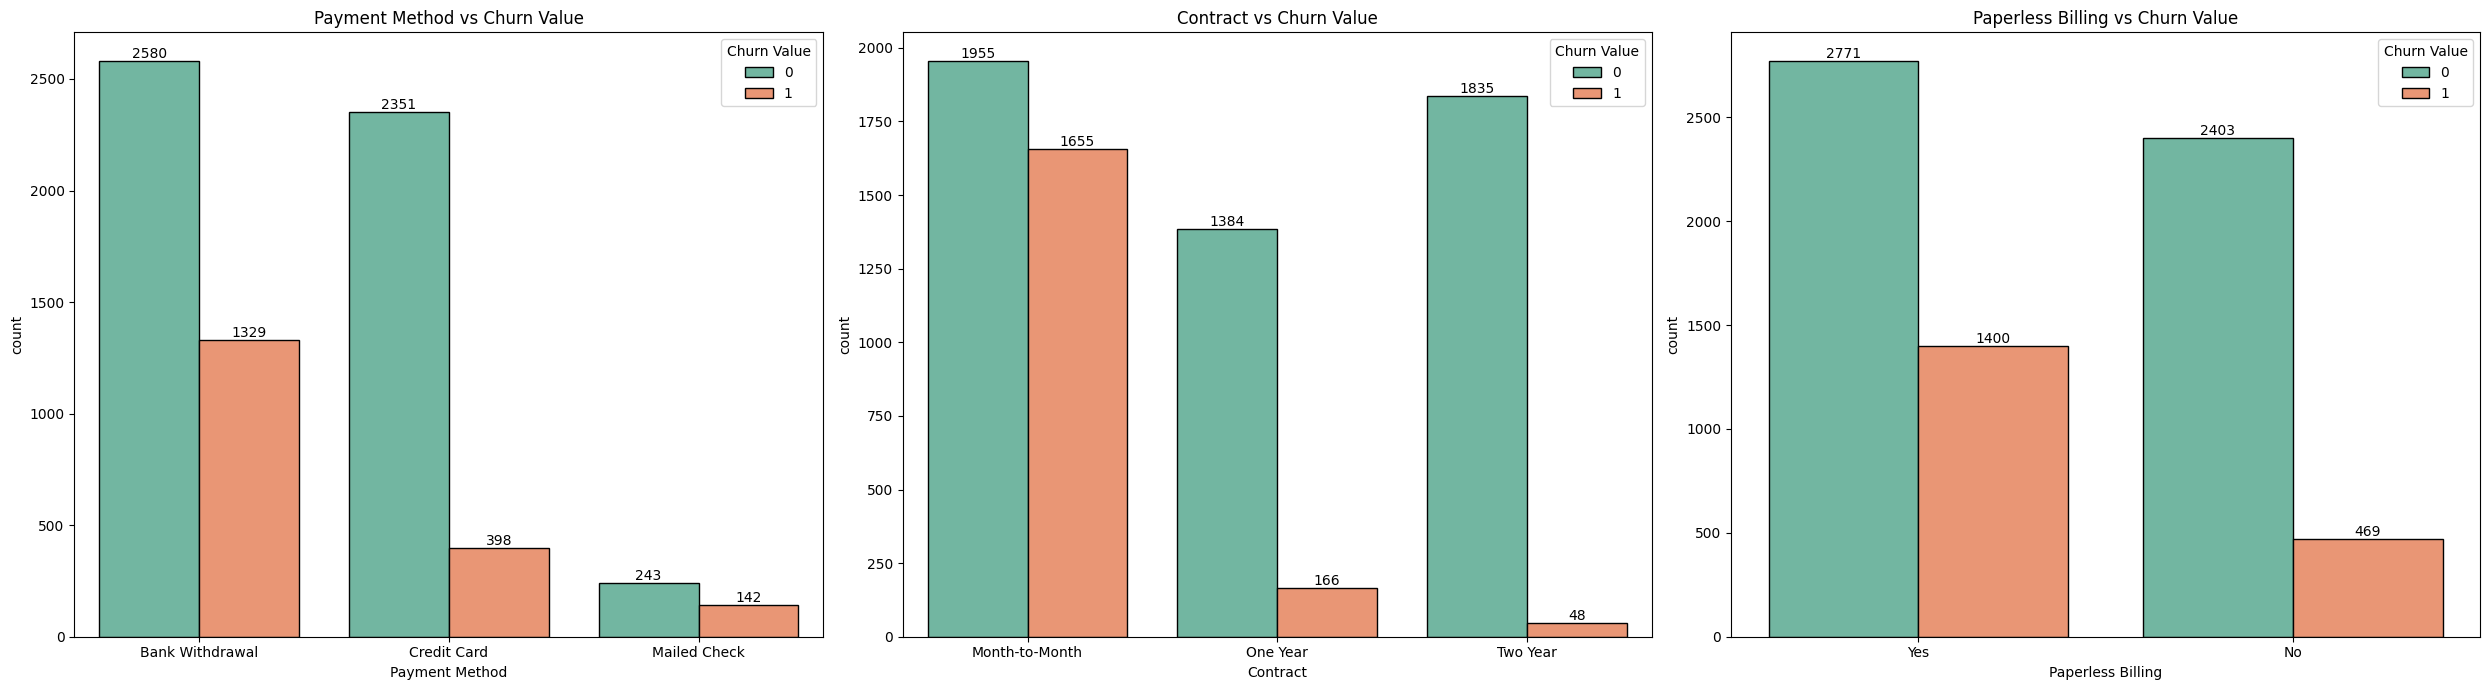

In [26]:
def countplots_custom(dataset, columns_list, figsize, palette):
    fig, axs = plt.subplots(1, len(columns_list), figsize=figsize)
    for i, column in enumerate(columns_list):
        ax = sns.countplot(data=dataset, x=column, hue="Churn Value", palette=palette, edgecolor='black', ax=axs[i])
        ax.legend(loc='upper right', title='Churn Value')
        for container in ax.containers:
            ax.bar_label(container)
        title = f'{column} vs Churn Value'
        ax.set_title(title)

palette2 = "Set2"
figsize = (25, 7)

countplots_custom(dataset=telco, columns_list=payment_columns, figsize=figsize, palette=palette2)

plt.tight_layout()
plt.show()


1. **Contract Duration**: Customers with short-term contracts, particularly "Month-to-Month," exhibit significantly higher churn rates. The flexibility of shorter contracts may lead to more frequent customer turnover.

2. **Paperless Billing**: Customers who opt for paperless billing are more likely to churn compared to those who receive physical bills. This shift towards digital billing methods could be associated with a higher churn rate.

3. **Payment Method**: Customers who choose bank withdrawals as their payment method are notably more prone to churn. The reasons behind this trend warrant further investigation, but it's clear that the choice of payment method can impact churn rates.

Offer

Lastly, our dataset includes information on five distinct offers. We will explore how Churn Value varies based on the type of offer in the following sections.


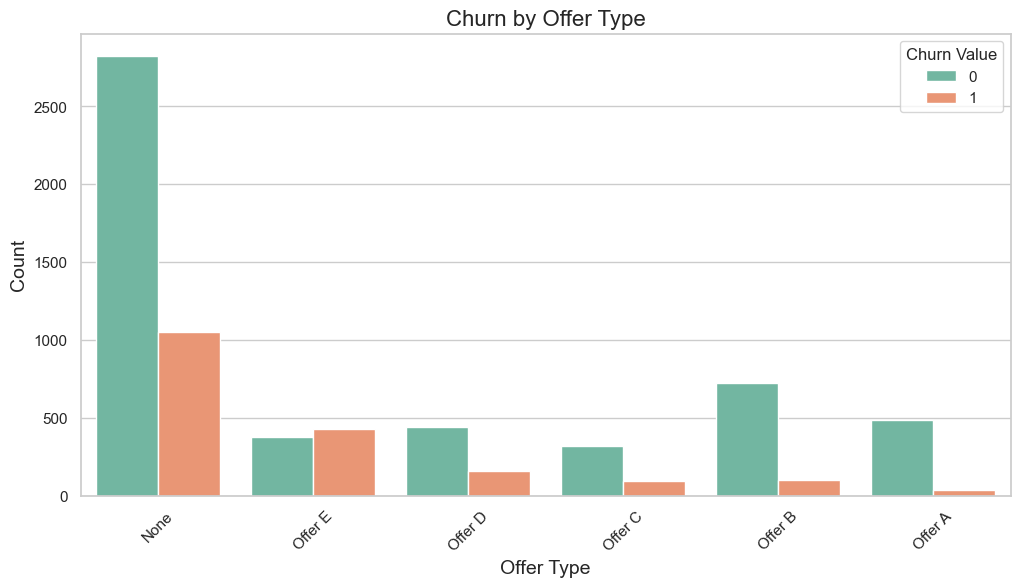

In [27]:
plt.figure(figsize=(12, 6))

# Create a countplot for the "Offer" column
sns.set(style="whitegrid")
sns.countplot(data=telco, x="Offer", hue="Churn Value", palette="Set2")

plt.title("Churn by Offer Type", fontsize=16)
plt.xlabel("Offer Type", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)

plt.show()


## Model 1: Logistic Regression

In our churn prediction algorithm, we will apply logistic regression. After fitting the model to the training data, we can predict the probability of churn for new customers. If the estimated probability is higher than a predefined threshold, we classify the customer as prone to churn; otherwise, they are classified as not prone to churn. 

In [28]:
lrtelco = pd.read_csv('./data/telco_churn_data.csv')
lrtelco = lrtelco.set_index('Customer ID')

# replacing the null values in Offer and internet type with "none" string
lrtelco["Offer"] = lrtelco["Offer"].fillna("None")
lrtelco["Internet Type"] = lrtelco["Internet Type"].fillna("None")

Let's check again the data types of each variable and separate continuous and categorical variables. We will also separate those categorical variables containing only 2 labels and those containing more than 2 labels.

In [29]:
columns_types = lrtelco.dtypes

all_columns = lrtelco.columns

# Categorical and continuous variables
continuous_vars = [col for col in columns_types.keys() if columns_types[col] != 'object']
cat_vars = [col for col in columns_types.keys() if columns_types[col] == 'object']

# Binary and Multiple categorical variables
binary_cat_vars = [c for c in cat_vars if len(set(lrtelco[c]))==2]
multi_cat_vars = [c for c in cat_vars if len(set(lrtelco[c]))>2]

After our preprocessing labour, we can see that we only have 7 categorical variables containing more than 2 different labels.

In [30]:
for col in multi_cat_vars:
    print("\nUnique values in", col, ":")
    print(lrtelco[col].unique())


Unique values in Offer :
['None' 'Offer E' 'Offer D' 'Offer C' 'Offer B' 'Offer A']

Unique values in Internet Type :
['Fiber Optic' 'Cable' 'DSL' 'None']

Unique values in Contract :
['Month-to-Month' 'One Year' 'Two Year']

Unique values in Payment Method :
['Bank Withdrawal' 'Credit Card' 'Mailed Check']

Unique values in City :
['Los Angeles' 'Inglewood' 'Whittier' ... 'Topaz' 'Jacumba' 'Holtville']

Unique values in Churn Category :
['Competitor' 'Dissatisfaction' 'Price' 'Other' 'Attitude' nan]

Unique values in Churn Reason :
['Competitor offered more data' 'Competitor made better offer'
 'Limited range of services' 'Extra data charges'
 'Competitor had better devices' "Don't know" 'Service dissatisfaction'
 'Lack of affordable download/upload speed' 'Product dissatisfaction'
 'Long distance charges' 'Poor expertise of online support'
 'Attitude of support person' 'Network reliability'
 'Competitor offered higher download speeds' 'Moved' 'Price too high'
 'Attitude of service p

In [31]:
# Amount of different cities
print("The amount of cities in the dataset is:", len(lrtelco["City"].unique()))

The amount of cities in the dataset is: 1106


We decided to drop the following columns:  

**City:** There are 1106 cities in the dataset, so to do a one hot encoding it would create a vector of length 1106, making it difficult to process in the algorithm.  
**Population:** This describes the city, so without the column this feature is unnecessary.  
**Under 30:** Unnecessary because we have the age feature.  
**Senior citizen** Same as above.  
**Dependents:** Because it can be described with the feature **Number of dependents**.  
**Churn category:** Because it only describes the customers that already churned.   
**Churn reason:** Same as above. Both can be used to see the reason for chrning and prevent it by formulating according strateies.  
**Customer satisfaction:** Too many missing values.

In [32]:
columns_to_drop = ["City", "Population", "Under 30", "Senior Citizen", "Dependents", 
                'Churn Category', 'Churn Reason', 'Customer Satisfaction']
lrtelco = lrtelco.drop(columns_to_drop, axis=1)

In [33]:
# Doing this again without the coulmns we dropped
columns_types = lrtelco.dtypes

all_columns = lrtelco.columns

#Continuous and Categorical
continuous_vars = [col for col in columns_types.keys() if columns_types[col] != 'object']
cat_vars = [col for col in columns_types.keys() if columns_types[col] == 'object']

#Binary and Multiple
binary_cat_vars = [c for c in cat_vars if len(set(lrtelco[c]))==2]
multi_cat_vars = [c for c in cat_vars if len(set(lrtelco[c]))>2]

### 2.1. Variable Encoding

#### 2.1.1. Label Encoding

We will encode using `LabelEncoder()` those colmns whic have only 2 labels (like Yes and No)

In [34]:
# Create a LabelEncoder object
label_enc = LabelEncoder()

# Apply the LabelEncoder to encode categorical columns
df_label_encoder = lrtelco[binary_cat_vars].apply(label_enc.fit_transform)

# Update column names in df_label_encoder to match the original column names
df_label_encoder.columns = [c for c in df_label_encoder]

# Update the original lrtelco DataFrame with the encoded values
lrtelco.update(df_label_encoder)


#### 2.1.2. OneHotEncoding

We will encode using `OneHotEncoder()` those colmns whic have more than 2 labels

In [35]:
# Create a OneHotEncoder object 
onehot_enc = OneHotEncoder(handle_unknown='ignore')

# OneHotEncoder to encode multi-category columns in the lrtelco DataFrame
cat_onehot_enc = onehot_enc.fit_transform(lrtelco[multi_cat_vars]
                                           .fillna('unknown')
                                          ).toarray()

# Get the names of the one-hot encoded columns
onehot_encoded_columns = onehot_enc.get_feature_names_out()

# Create a DataFrame (df_onehot_encoder) to store the one-hot encoded values
df_onehot_encoder = pd.DataFrame(cat_onehot_enc,
                                 columns=onehot_encoded_columns,
                                 index=lrtelco.index
                                )

# Update the lrtelco DataFrame by joining the one-hot encoded columns
lrtelco = (lrtelco[[c for c in all_columns if c not in multi_cat_vars]]
              .join(df_onehot_encoder))


Let's visualize the correlation matrix of these new variable generated by the OneHotEncoder.

<AxesSubplot: >

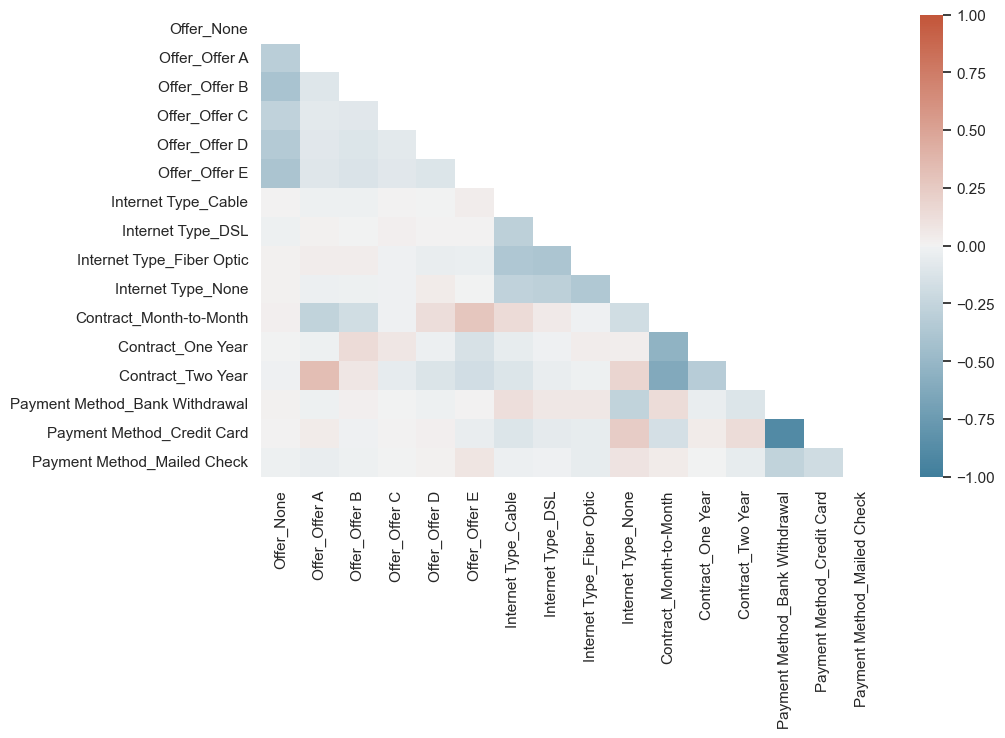

In [36]:
# Correlation matrix for the one-hot encoded DataFrame (df_onehot_encoder)
corr = df_onehot_encoder.corr(numeric_only=True)

# We then create a boolean mask to hide the upper triangular part of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Colors
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Heatmap of the correlation matrix with the mask applied
sns.heatmap(corr, mask=mask, cmap=cmap, annot=False, vmin=-1, vmax=1)


# 3. Train Logistic model

In [37]:
# Separating the dataset into train and test
X = lrtelco.drop(['Churn Value'], axis=1)
y = lrtelco['Churn Value'].astype('int')

# The test has 25% of the data and we use a random state at 222

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size=0.25,
                                                    random_state=222)

## 3.1. Select K best Features

We will attempt to train the model only with the most relevant features of our dataset. To achieve this we will train and test the algorithm with varying combinations of features and compare them using the ROC-AUC metric.

In [38]:
# Select the algorithm to train
classifier = LogisticRegression(solver='lbfgs', max_iter=200, random_state=123)

Classifier Evaluated: LogisticRegression(max_iter=200, random_state=123)


Text(0, 0.5, 'Cross-Validated AUC')

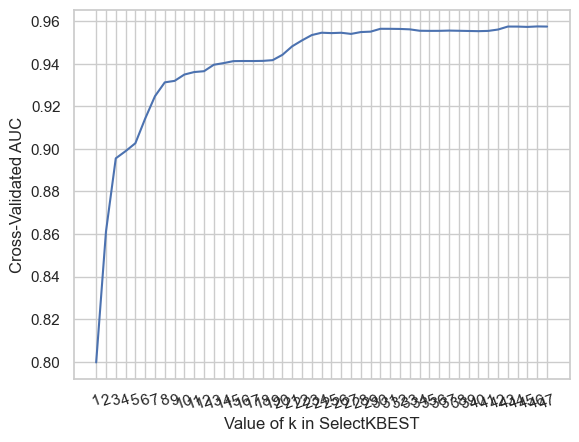

In [39]:
print('Classifier Evaluated: {}'.format(classifier))

k_range = list(range(1, len(X.columns)))
k_scores = []

for k in k_range:
    example_pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),          # Imputing missing values with the median
        ('standardscaler', StandardScaler()),                   # Scaling the data using StandardScaler
        ('selector', SelectKBest(k=k)),                         # Selects the best k features of our dataset 
        ('classifier', classifier)])
    score = cross_val_score(example_pipe, X, y, cv=5, scoring='roc_auc').mean()    # Cross val using 5 folds and the score metric is set to AUC
    k_scores.append(score)

k_scores_df = pd.DataFrame({
    'k_range': k_range, 
    'k_scores':k_scores
})

# Plotting the AUC across the different k values
plt.plot(k_range, k_scores)
plt.xlabel('Value of k in SelectKBEST')
plt.xticks(k_range, rotation=20) 
plt.ylabel('Cross-Validated AUC')

The best number of columns is 47 (using all features). However, using so many collumns will take a lot o time to train and will be only slightly better. Looking at the graph, we chose k = 8 because just after 8 the curve starts to flatten. With k = 8, he AUC is approx 0.93 which is 0.02 less than the highest AUC with all of the features.

In [40]:
k_select = 8

pipe = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('standardscaler', StandardScaler()),
        ('selector', SelectKBest(k=k_select)),
        ('classifier', classifier)])
pipe.fit(X_train, y_train)
cols_idxs = pipe[2].get_support(indices=True)               # Mask that indicates which features have been seleccted by the SelectKBest func
best_k_columns = X_train.columns[cols_idxs]

In [41]:
pipe

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('selector', SelectKBest(k=8)),
                ('classifier',
                 LogisticRegression(max_iter=200, random_state=123))])

In [42]:
list(best_k_columns)

['Number of Referrals',
 'Tenure in Months',
 'Total Long Distance Charges',
 'Total Customer Svc Requests',
 'Product/Service Issues Reported',
 'Internet Type_Cable',
 'Contract_Month-to-Month',
 'Contract_Two Year']

These are the most relevant features of our dataset.

## 3.2. Data Augmentation

After selecting the best features, we will apply data augumentation to address the imbalance in the Churn category

For this use case we will use the `SMOTE` technique. It is used to address class imbalance by creating synthetic samples for the minority class by interpolating between existing samples, effectively increasing its representation in the dataset.

In [43]:
steps = [SimpleImputer(strategy='median'),      # Imputer
        StandardScaler(),                       # Scaler
        SMOTE(random_state=42),                 # Augmentation
        SelectKBest(k=k_select),                # Selector 
        classifier]                             # Logistic regression

pipe = make_pipeline(*steps)
pipe.fit(X_train, y_train)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('smote', SMOTE(random_state=42)),
                ('selectkbest', SelectKBest(k=8)),
                ('logisticregression',
                 LogisticRegression(max_iter=200, random_state=123))])

# 4. Model Evaluation

The `.predict()` method uses a default threshold of 0.5 to classify predictions into the positive or negative class. However, it is in the company´s best interest to have a threshold different from 0.5 because it will depend on the balance between amount of churners captured and amount of resources invested.

For that reason, we are going to use the `predict_proba()` method, which returns a two-dimensional array, containing the estimated probabilities for each instance and each class: "No Churn" and "Churn"

In [44]:
y_predict = pipe.predict_proba(X_test)

## 4.1. Confusion Matrix

In [45]:
# Define a manual threshold value for classification
threshold = 0.7

# Create a binary classification for predicted probabilities
# If the predicted probability is greater than the threshold, assign 1; otherwise, assign 0
y_predict_class = [1 if p > threshold else 0 for p in y_predict[:, 1]]


The manual threshold will depend on the amount of resources available to prevent churners. In a perfect world, we would spend resources on every single client. However, companies dont have those resources available, so we give them the most significant clients to focus on depending on how much they want to spend. 

The manual threshold of 0.7 is set so that the company can focus on 30% of their most probable churner clients, while having a decent recall of 0.75 (in the churner category) as seen in the classification report that follows. This number can be increased if the company wants to prevent more churners focusing on a higher percentage of their clients.  

With a threshold of 0.7, we "capture" 3 in 4 possible churners.

In [46]:
print(classification_report(y_test, y_predict_class))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92      1291
           1       0.77      0.75      0.76       470

    accuracy                           0.88      1761
   macro avg       0.84      0.84      0.84      1761
weighted avg       0.87      0.88      0.87      1761



Text(0.5, 22.249999999999993, 'Predicted label')

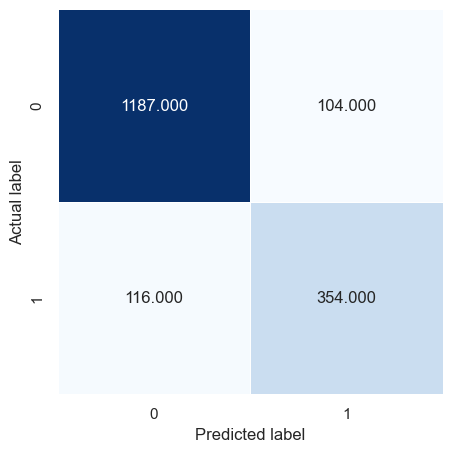

In [47]:
# Confusion matrix based on actual and predicted classifications
cm = confusion_matrix(y_test, y_predict_class)

# Plot
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues', cbar=False)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## 4.2. Probability Distribution

Let's also analyze the probability distribution plot.

With this plot we can clearly see the probability distributions of the classes "Churn" and "Not Churn" and decide on a threshold.

Text(0.5, 22.249999999999993, 'Predicted label')

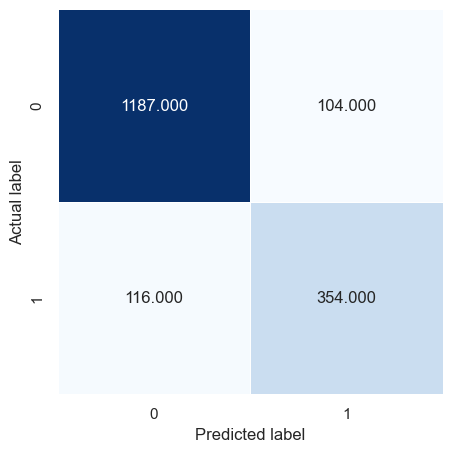

In [48]:
# Confusion matrix based on actual and predicted classifications
cm = confusion_matrix(y_test, y_predict_class)

# Plot
plt.figure(figsize=(5, 5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='Blues', cbar=False)

plt.ylabel('Actual label')
plt.xlabel('Predicted label')


## 4.3. ROC Curve 

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It illustrates the trade-off between the true positive rate (sensitivity or recall) and the false positive rate (1 - specificity) for different threshold values used to classify instances. A perfect classifier would have an ROC curve that goes straight up to the top left corner (true positive rate of 1 and false positive rate of 0), while a random classifier would be a diagonal line from the bottom left to the top right (true positive rate equals false positive rate).

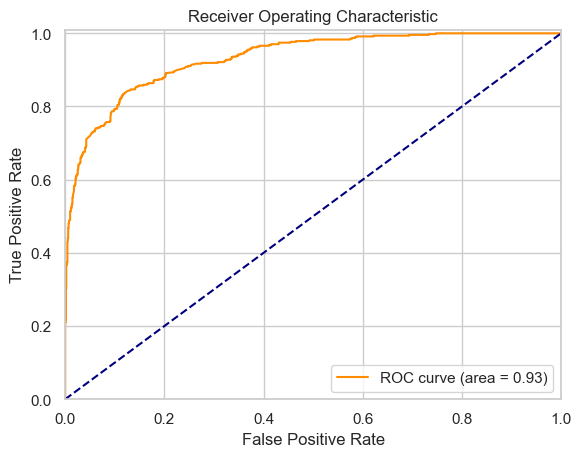

In [49]:
# ROC curve values: false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_predict[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_aucl = auc(fpr, tpr)

# Create the ROC curve plot
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_aucl)

# Add a reference diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

# Set the x-axis and y-axis limits
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

# Set the x-axis label as 'False Positive Rate'
plt.xlabel('False Positive Rate', size=12)

# Set the y-axis label as 'True Positive Rate'
plt.ylabel('True Positive Rate', size=12)

# Title
plt.title('Receiver Operating Characteristic')

# Legend
plt.legend(loc="lower right")

plt.show()


## 4.4. Precision-Recall Curve

The ROC curve may not be suitable for imbalanced problems because it focuses on the overall classification performance, which can be misleading when classes are imbalanced. It emphasizes true positive and false positive rates, making the evaluation less informative when the majority class dominates. 
Metrics like precision-recall curve or F1-score are more appropriate for assessing model performance in imbalanced datasets, as they consider the class distribution and prioritize correct predictions for the minority class.

Thus, let's also analyze the precision-recall curve.

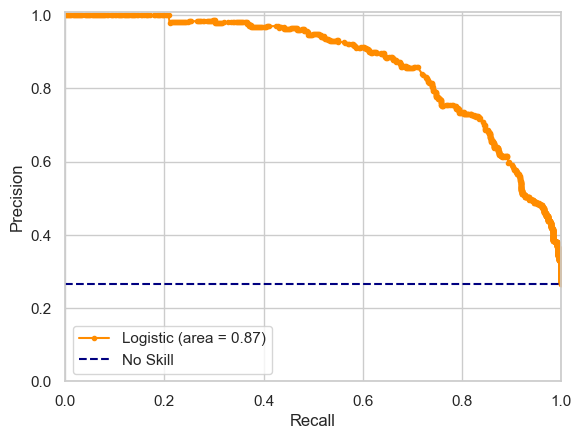

In [50]:
# Calculate precision and recall values and thresholds for the precision-recall curve
precision, recall, thresholds = precision_recall_curve(y_test, y_predict[:, 1])

# Area under the precision-recall curve (PR AUC)
pr_auc = auc(recall, precision)

# Calculate the proportion of actual positive cases in the dataset (no_skill)
no_skill = len(y_test[y_test == 1]) / len(y_test)

# Create the precision-recall curve plot
plt.plot(recall, precision, marker='.', color='darkorange', label='Logistic (area = %0.2f)' % pr_auc)

# Add a reference line representing no skill (random classifier)
plt.plot([0, 1], [no_skill, no_skill], color='navy', linestyle='--', label='No Skill')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()


We can also use this curve to detect and select the threshold we should select in order to have the desired recall level that the company wants.

In [52]:
# We set the recall level we want
recall_wanted = 0.8

# Find the position in the array where recall is closest to the desired recall level
position_in_array = min(np.where(recall == min(recall[recall > recall_wanted]))[0])

# Get the threshold value at that position
threshold = np.round(thresholds[position_in_array], 2)

# Get the precision value at that position
prec = np.round(precision[position_in_array], 2)

# Results
print(f'Recall of {recall_wanted} is obtained with a threshold of {threshold} and a precision of {prec}')


Recall of 0.8 is obtained with a threshold of 0.64 and a precision of 0.73


If the company wants to "capture" 80% of possible churners, the threshold will be 0.62 meaning thet they will need to focus on 38% of their customer base.

## Model 2: XGBoosting

In our churn prediction algorithm, we will create an ensemble of decision trees using XGBoost. These trees will be trained to predict whether a customer is likely to churn or not based on various features such as contract type, monthly charges, and others. The model will undergo training on a labeled dataset, and its parameters will be tuned to minimize the chosen loss function. 

### Data preprocessing

In [53]:
dfXGB=telco

columns_to_drop = ["Zip Code", "Latitude", "Longitude", "Population", 'Customer ID','Senior Citizen', 'Dependents', 'Internet Service', 'City']
dfXGB = dfXGB.drop(columns=columns_to_drop)


Convert Yes to 1 and No to 0

In [54]:
columns_to_convert = ["Phone Service", "Multiple Lines", "Online Security", "Online Backup",
                      "Device Protection Plan", "Premium Tech Support", "Streaming TV", "Streaming Movies",
                      "Streaming Music", "Unlimited Data", "Paperless Billing", "Married"]


dfXGB[columns_to_convert] = dfXGB[columns_to_convert].replace({"Yes": 1, "No": 0})


Gender will be transformed too with Female: 1 and Male: 0

In [55]:
# Gender categories to numerical values:

# Mapping
gender_mapping = {"Female": 1, "Male": 0}

# Apply the mapping to the "Gender" column in the DataFrame (dfXGB)
dfXGB["Gender"] = dfXGB["Gender"].map(gender_mapping)


The same we do with the column Contract

In [56]:
contract_mapping = {
    'Two Year': 2,
    'One Year': 1,
    'Month-to-Month': 0
}


dfXGB['Contract'] = dfXGB['Contract'].map(contract_mapping)

Payment Method, Internet Type, Offer

With .value_counts() we check the number of times each unique value appears in the column desired

In [57]:
dfXGB["Payment Method"].value_counts()

Bank Withdrawal    3909
Credit Card        2749
Mailed Check        385
Name: Payment Method, dtype: int64

In [58]:
dfXGB["Internet Type"].value_counts()

Fiber Optic    2291
DSL            1680
Cable          1546
None           1526
Name: Internet Type, dtype: int64

In [59]:
dfXGB["Offer"].value_counts()

None       3877
Offer B     824
Offer E     805
Offer D     602
Offer A     520
Offer C     415
Name: Offer, dtype: int64

Label encoding is not a suitable option in cases where there is no inherent ordinal relationship between the categories of a categorical variable. Label encoding assigns a unique numerical value to each category, which may imply an order or ranking that doesn't exist. This can lead to misleading interpretations by machine learning models, as they may incorrectly assume a relationship between the numbers assigned to the categories. For instance, if we label encode non-ordinal features like "Offer" or "City," the models might erroneously interpret the encoded values as having a meaningful sequence or hierarchy. In such situations, one-hot encoding is a more appropriate choice, as it treats each category as a separate binary variable, avoiding the introduction of unintended relationships between categories.

### One-hot encoding

One-hot encoding is a technique used in machine learning to convert categorical variables into a numerical format. Categorical variables such as "Payment Method," "Internet Type," or "Offer". Machine learning models require numeric input, and one-hot encoding is a way to represent categorical variables as binary (0 or 1) columns for each category. This allows the model to understand and use these categorical variables for predictions effectively.

In [60]:
# Define a list of column names to apply one-hot encoding
columns_to_dummy = ["Payment Method", "Internet Type", "Offer"]

# Apply one-hot encoding to the specified columns
dfXGB = pd.get_dummies(dfXGB, columns=columns_to_dummy, drop_first=True)


In [61]:
dfXGB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 39 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Number of Referrals                7043 non-null   int64  
 1   Tenure in Months                   7043 non-null   int64  
 2   Phone Service                      7043 non-null   int64  
 3   Avg Monthly Long Distance Charges  7043 non-null   float64
 4   Multiple Lines                     7043 non-null   int64  
 5   Avg Monthly GB Download            7043 non-null   int64  
 6   Online Security                    7043 non-null   int64  
 7   Online Backup                      7043 non-null   int64  
 8   Device Protection Plan             7043 non-null   int64  
 9   Premium Tech Support               7043 non-null   int64  
 10  Streaming TV                       7043 non-null   int64  
 11  Streaming Movies                   7043 non-null   int64

### Train test split

Stratified splitting:

Stratified splitting is a technique used in machine learning, especially for classification tasks, when splitting a dataset into training and testing sets. It's essential when dealing with imbalanced datasets, where one class of data significantly outnumbers the other class. The goal of stratified splitting is to ensure that the proportion of classes in both the training and testing sets remains similar to the original dataset.

In [62]:
# Separating the df into independent and dependent variables

X = dfXGB.drop('Churn Value', axis=1)
y = dfXGB['Churn Value']

In [63]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets
# X: Features, y: Target variable (labels)
# stratify=y: Ensures that the class distribution in the training and testing sets is similar
# test_size=0.25: Specifies that 25% of the data will be used for testing, and the rest for training
# random_state=42: Sets a random seed for reproducibility

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.25, random_state=42)


### Model

In [64]:
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, accuracy_score, roc_auc_score
from sklearn.metrics import classification_report

Features

In [65]:
print(X_train.columns)

Index(['Number of Referrals', 'Tenure in Months', 'Phone Service',
       'Avg Monthly Long Distance Charges', 'Multiple Lines',
       'Avg Monthly GB Download', 'Online Security', 'Online Backup',
       'Device Protection Plan', 'Premium Tech Support', 'Streaming TV',
       'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Monthly Charge', 'Total Regular Charges',
       'Total Refunds', 'Total Extra Data Charges',
       'Total Long Distance Charges', 'Gender', 'Age', 'Married',
       'Number of Dependents', 'CLTV', 'Total Customer Svc Requests',
       'Product/Service Issues Reported', 'Payment Method_Credit Card',
       'Payment Method_Mailed Check', 'Internet Type_DSL',
       'Internet Type_Fiber Optic', 'Internet Type_None', 'Offer_Offer A',
       'Offer_Offer B', 'Offer_Offer C', 'Offer_Offer D', 'Offer_Offer E'],
      dtype='object')


Importance of characteristics

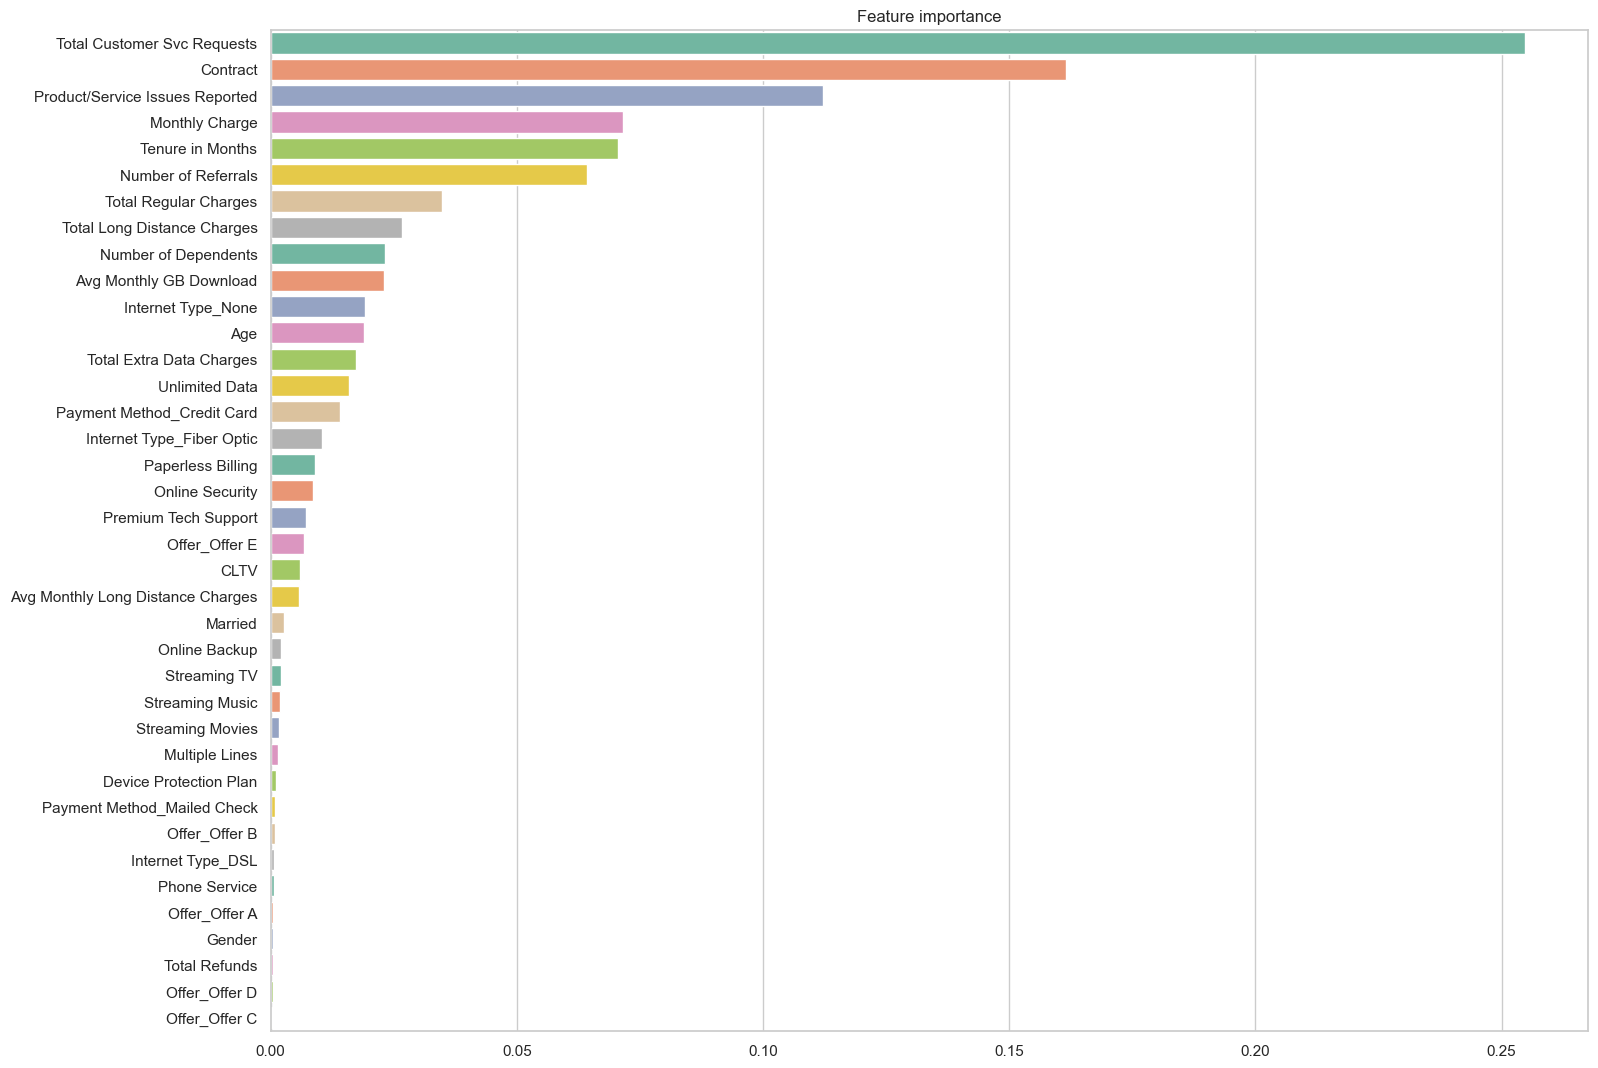

In [66]:
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier instance with specified hyperparameters
clf = RandomForestClassifier(
    max_depth=6,               # Maximum depth of each tree
    min_samples_leaf=5,        # Minimum number of samples required to be a leaf node
    min_samples_split=3,       # Minimum number of samples required to split an internal node
    n_estimators=10000,        # Number of trees in the forest
    random_state=42            # Random seed for reproducibility
)

# Fit the classifier to the training data
clf = clf.fit(X_train, y_train)

# Calculate feature importance
fimp = pd.Series(data=clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Create a bar plot to visualize feature importance
plt.figure(figsize=(17,13))
plt.title("Feature importance")
ax = sns.barplot(y=fimp.index, x=fimp.values, palette="Set2", orient='h')



We now train the model XGBCassifier

In [67]:
from xgboost import XGBClassifier

# Create an instance of the XGBoost classifier
XGBC = XGBClassifier()

# Fit the XGBoost classifier to the training data
XGBC.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [68]:
# Predictions:
y_pred = XGBC.predict(X_test)

### Metrics for validating the model

In [69]:
# Calculate Metrics
XGBC_Recall = recall_score(y_test, y_pred)  # Calculate recall (true positive rate)
XGBC_Precision = precision_score(y_test, y_pred)  # Calculate precision
XGBC_f1 = f1_score(y_test, y_pred)  # Calculate F1 score (harmonic mean of precision and recall)
XGBC_accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
XGBC_roc_auc = roc_auc_score(y_test, y_pred)  # Calculate ROC AUC score

# Compute the confusion matrix for XGBoost classifier predictions
Confussion_matrix_XGB = confusion_matrix(y_test, y_pred)


Text(0.5, 22.249999999999993, 'Predicted label')

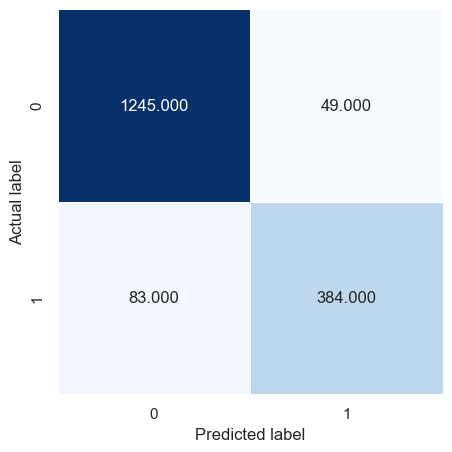

In [70]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues', cbar=False)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

- True Positives (384) represent cases where the model correctly predicted the positive class.
- False Positives (49) represent cases where the model incorrectly predicted the positive class.
- True Negatives (1,245) represent cases where the model correctly predicted the negative class.
- False Negatives (83) represent cases where the model incorrectly predicted the negative class.

### K-fold

K-fold cross-validation is a technique used to assess the performance of a machine learning model. It involves splitting the dataset into K equal-sized "folds" or subsets. The model is trained on K-1 of these folds and tested on the remaining fold. This process is repeated K times, each time using a different fold as the test set and the rest for training. The results are averaged over these K iterations to provide a more robust estimate of the model's performance, helping to detect issues like overfitting.

In [71]:
from statistics import stdev
from sklearn.model_selection import cross_val_score

In [72]:
# Perform k-fold cross-validation for the XGBoost classifier
# We're using 5-fold cross-validation (cv=5)
score = cross_val_score(XGBC, X_train, y_train, cv=5, scoring='recall', error_score="raise")

# Calculate the mean and standard deviation of the recall scores across folds
XGBC_cv_score = score.mean()
XGBC_cv_stdev = stdev(score)

# Print the recall scores for each fold
print('Cross Validation Recall scores are: {}'.format(score))

# Print the average recall score across all folds
print('Average Cross Validation Recall score: ', XGBC_cv_score)

# Print the standard deviation of recall scores across folds
print('Cross Validation Recall standard deviation: ', XGBC_cv_stdev)


Cross Validation Recall scores are: [0.82918149 0.80427046 0.78214286 0.78928571 0.80714286]
Average Cross Validation Recall score:  0.8024046771733604
Cross Validation Recall standard deviation:  0.018204243995687458


The results of the cross-validation for the "Recall" metric (Recall measures the proportion of true positives over the sum of true positives and false negatives) are as follows:

1. "Cross Validation Recall scores" are the Recall scores for each of the 5 cross-validation folds. These values represent the Recall score for each test dataset in each fold.

2. "Average Cross Validation Recall score" is the average of the Recall scores across the 5 folds. In this case, the average score is approximately 0.8024. This indicates that, on average, the model has a Recall rate of 80.24% across the 5 cross-validation folds.

3. "Cross Validation Recall standard deviation" is the standard deviation of the Recall scores across the 5 folds. In this case, the standard deviation is approximately 0.0182. The standard deviation measures the variability of the Recall scores between the different folds. A lower standard deviation indicates less variability in Recall scores across the folds.

In summary, the results suggest that the model performs well in terms of Recall, with an average of approximately 80.24%. The relatively low standard deviation (0.0182) implies that the Recall scores are consistent across different cross-validation folds, indicating that the model is robust and generalizes effectively to different test datasets.

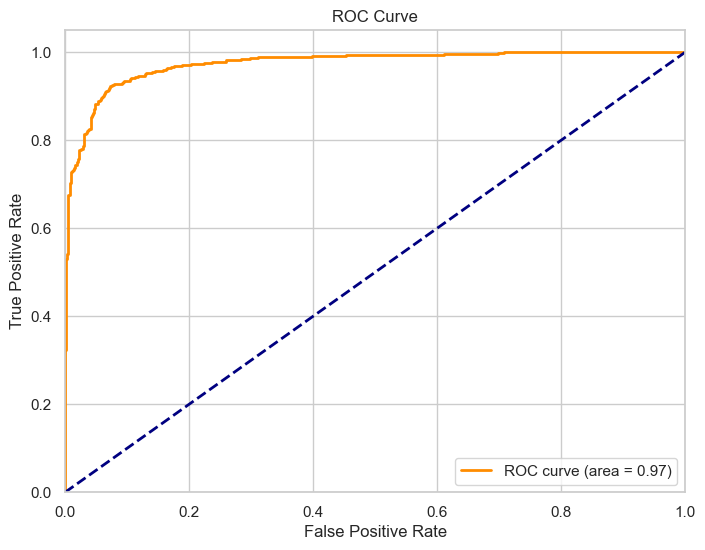

In [73]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Probabilities of the models prediction
y_prob = XGBC.predict_proba(X_test)[:, 1]

# AUC-ROC score
roc_auc = roc_auc_score(y_test, y_prob)

# ROC curve
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Plot
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


## Choosing the best algorithm 

Finally, we compare the metrics results of each one of the models

In [74]:
# Create a dictionary 'data' to store model evaluation metrics
data = {
    'Model': ['XGBoosting'],  # Name of the model
    'Recall': [XGBC_Recall],  # Recall score
    'Precision': [XGBC_Precision],  # Precision score
    'F1': [XGBC_f1],  # F1 score
    'Accuracy': [XGBC_accuracy],  # Accuracy score
    'ROC-AUC': [XGBC_roc_auc]  # ROC-AUC score
}

# Create a Pandas DataFrame 'xgbresult' using the 'data' dictionary
xgbresult = pd.DataFrame(data)


In [75]:
# The same is done for the k-folds model

data_kfolds = {
    'Model': ['XGBoosting k-folds'],
    'Recall': [XGBC_cv_score],
    'ROC-AUC': [roc_auc]
}

df_kfolds = pd.DataFrame(data_kfolds)



In [76]:
# Convert the report donde earlier tu a df

report = classification_report(y_test, y_predict_class, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df

,precision,recall,f1-score,support
0,0.725249,0.730294,0.727763,1294.000000
1,0.237991,0.233405,0.235676,467.000000
accuracy,0.598524,0.598524,0.598524,0.598524
macro avg,0.481620,0.481849,0.481719,1761.000000
weighted avg,0.596033,0.598524,0.597266,1761.000000


Logistic Regression Report

- **Precision**: Precision is the ratio of true positives (customers who actually churned and were correctly predicted) to all cases predicted as positive (customers predicted to churn). In the context of the churn rate, precision is 72.52% for the "No Churn" class and 23.80% for the "Churn" class. This means that the model performs well in predicting customers who will not churn but has lower precision in predicting customers who will churn.

- **Recall**: Recall is the ratio of true positives to all actual positive cases (customers who actually churned). For the "No Churn" class, the recall is 73.03%, indicating that the model captures most of the customers who will not churn. For the "Churn" class, the recall is 23.34%, meaning that the model captures a lower proportion of customers who will actually churn.

- **F1-Score**: The F1 score is a metric that combines precision and recall into a single value. It is useful when there is an imbalance between classes, as is the case with the churn rate. The F1 score is 72.77% for the "No Churn" class and 23.57% for the "Churn" class, indicating a balance between precision and recall.

- **Support**: The "support" column shows the number of cases in each class. In this case, there are 1,294 cases of "No Churn" and 467 cases of "Churn."

- **Accuracy**: The overall accuracy of the model is 59.85%. This means that the model correctly predicts 59.85% of all cases, regardless of whether they are "No Churn" or "Churn."

In summary, the logistic regression model performs better in predicting the "No Churn" class compared to the "Churn" class. Precision and recall are lower for the "Churn" class, suggesting that the model could benefit from improvements to better identify customers at risk of churn.

In [77]:
xgbresult

,Model,Recall,Precision,F1,Accuracy,ROC-AUC
0,XGBoosting,0.82227,0.886836,0.853333,0.925043,0.892201


In [78]:
df_kfolds

,Model,Recall,ROC-AUC
0,XGBoosting k-folds,0.802405,0.974163


XGBoosting Report


- **Recall**: The recall for the XGBoosting model is 82.23%. This indicates that the model captures a high proportion of customers who will actually churn. In other words, it performs well in identifying customers at risk of churn.

- **Precision**: The precision for the XGBoosting model is 88.68%. This means that the model correctly predicts a significant percentage of customers who are at risk of churning, and the positive predictions it makes are more reliable.

- **F1-Score**: The F1 score is 85.33% for the XGBoosting model, indicating a balance between precision and recall. This means that the model performs well in identifying customers at risk of churn while maintaining precision in its predictions.

- **Accuracy**: The overall accuracy of the XGBoosting model is 92.50%. This high accuracy suggests that the model correctly predicts the majority of cases, both "Churn" and "No Churn."

- **ROC-AUC**: The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is 89.22% for the XGBoosting model. This metric measures the model's ability to distinguish between "Churn" and "No Churn" cases. A higher ROC-AUC score indicates a better-performing model.

The XGBoosting model outperforms the logistic regression model in predicting the churn rate. It achieves a higher recall, precision, and F1-score, indicating its effectiveness in identifying customers at risk of churn. The high accuracy and ROC-AUC score further demonstrate the model's strong predictive capabilities.


The results including K-folds:

- **Recall**: The recall for the XGBoosting model with k-folds is 80.24%. This indicates that the model captures a significant proportion of customers who will actually churn, even when considering the cross-validation folds.

- **ROC-AUC**: The ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score is 97.42% for the XGBoosting model with k-folds. This high ROC-AUC score suggests that the model performs exceptionally well in distinguishing between "Churn" and "No Churn" cases, even after accounting for cross-validation.

In summary, the XGBoosting model with k-folds maintains a high level of recall, indicating its effectiveness in identifying customers at risk of churn across different cross-validation folds. The impressive ROC-AUC score demonstrates the model's robust performance in classifying churn cases. This model is well-suited for churn prediction in the telecommunications industry.

## Conclusions

**Conclusion on Churn Rate Prediction Models**

In this analysis, we evaluated three churn rate prediction models: Logistic Regression, XGBoosting, and XGBoosting with k-folds. Each model has its own strengths and weaknesses, and its suitability for implementation depends on the specific context and objectives of the telecommunications company.

Firstly, **Logistic Regression** provides solid results with a recall of 72.73%, indicating its capability to identify a high percentage of customers prone to churn. However, its ROC-AUC of 80.12% suggests a lower classification ability compared to other models.

On the other hand, **XGBoosting** offers a recall of 82.23% and an ROC-AUC of 89.22%, suggesting a better ability to detect at-risk customers and overall higher classification capability. This makes XGBoosting a strong choice for churn rate prediction in telecommunications companies.

**XGBoosting with k-folds** adds robustness to the model, maintaining a good recall of 80.24% and an impressive ROC-AUC of 97.42%. The incorporation of k-folds improves the model's generalization and makes it more reliable in cross-validation scenarios.

Overall, the model choice will depend on the company's objectives and the desired balance between the ability to identify customers prone to churn and overall classification capability. Each model offers distinct advantages, and the selection will depend on the specific business needs. These models provide a solid foundation for informed decision-making and proactive customer retention strategies in the telecommunications industry. However, it's essential to remember that continuous improvement and adaptation to changing market conditions are crucial for long-term success in customer retention.